<div class="alert alert-info">
<b>Прогноз удоя и вкуса молока у коров перед покупкой</b>
</div>

<div class="alert alert-info">
<b>Задача:</b>
<br>Спрогнозировать удой и вкус молока. А также с помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов, молоко должно быть вкусным.
<br>
<b>Данные:</b>
<br>
<br>Дано 3 таблицы 
<br>1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент.
<br>id — уникальный идентификатор коровы.
<br>Удой, кг — масса молока, которую корова даёт в год (в килограммах).
<br>ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
<br>Сырой протеин, г — содержание сырого протеина в корме (в граммах).
<br>СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
<br>Порода — порода коровы.
<br>Тип пастбища — ландшафт лугов, на которых паслась корова.
<br>порода папы_быка — порода папы коровы.
<br>Жирность,% — содержание жиров в молоке (в процентах).
<br>Белок,% — содержание белков в молоке (в процентах).
<br>Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
<br>Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
<br>
<br>2. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
<br>id — уникальный идентификатор коровы.
<br>Имя Папы — имя папы коровы.
<br>
<br>3.Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
<br>Порода — порода коровы.
<br>Тип пастбища — ландшафт лугов, на которых паслась корова.
<br>порода папы_быка — порода папы коровы.
<br>Имя_папы — имя папы коровы.
<br>Текущая_жирность,% — содержание жиров в молоке (в процентах).
<br>Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
<br>Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Импортируем библиотеки.
</div>

In [1]:
import pandas as pr 
import matplotlib.pyplot as df
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.24.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\yurpa\anaconda3\envs\practicum\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: skorch


## Загрузка данных

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Загружаем датасет 'ferma_main.csv' и сохраняем его в 'cow_1' после выводим о нем информацию.
</div>

In [3]:
cow_1 = pr.read_csv('ferma_main.csv', sep=';', decimal =',')
cow_1.head()

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

In [4]:
cow_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Загружаем датасет 'ferma_dad.csv' и сохраняем его в 'cow_2' после выводим о нем информацию.
</div>

In [5]:
cow_2 = pr.read_csv('ferma_dad.csv', sep=';')
cow_2.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [6]:
cow_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


<div class="alert alert-info">
<b>Комментарий:</b>
<br>Загружаем датасет 'cow_buy.csv' и сохраняем его в 'cow_3' после выводим о нем информацию.
</div>

In [7]:
cow_3 = pr.read_csv('cow_buy.csv', sep=';',decimal =',')
cow_3.head()

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

In [8]:
cow_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


<div class="alert alert-info">
<b>Вывод главы:</b>
<br>Было создано 3 таблицы. 
<br> 1.cow_1 - данные о коровах фермера
<br> 2.cow_2 - имена быков
<br> 3.cow_3 - данные о продаваемых коровах
</div>

##  Предобработка данных

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Проверяем cow_1 на наличие пропусков и дубликатов. При наличии убираем их.
</div>

In [9]:
cow_1.isna().sum()

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

In [10]:
cow_1.duplicated().sum()

5

In [11]:
cow_1 = cow_1.drop_duplicates()

In [12]:
cow_1.duplicated().sum()

0

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Меняем названия столбцов в cow_1 на более удобный. А так-же приводим текст в данных в нижний регистр.
</div>

In [13]:
cow_1 = cow_1.rename(columns = {'Удой, кг' : 'удой_кг',
            'ЭКЕ (Энергетическая кормовая единица)' : 'эке_энергетическая_кормовая_единица',
            'Сырой протеин, г' : 'сырой_протеин_г',
            'СПО (Сахаро-протеиновое соотношение)' : 'спо_Сахаро-протеиновое_соотношение',
            'Порода' : 'порода',
            'Тип пастбища' : 'тип_пастбища',
            'порода папы_быка' : 'порода_папы_быка',
            'Жирность,%': 'жирность_%',
            'Белок,%' : 'белок_%',
            'Вкус молока' : 'вкус_молока',
            'Возраст' : 'возраст'})

In [14]:
cow_1['тип_пастбища'] = cow_1['тип_пастбища'].str.lower() 
cow_1['порода_папы_быка'] = cow_1['порода_папы_быка'].str.lower() 
cow_1['порода'] = cow_1['порода'].str.lower() 

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Смотрим наличие в cow_1 неявных дубликатов, при наличии исправляем их.
</div>

In [15]:
cow_1['порода'].unique()

array(['вис бик айдиал', 'рефлешнсоверинг'], dtype=object)

In [16]:
cow_1['тип_пастбища'].unique()

array(['равнинное', 'равнинные', 'холмистое'], dtype=object)

In [17]:
cow_1['тип_пастбища'].replace('равнинные', 'равнинное', inplace=True)
cow_1['тип_пастбища'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [18]:
cow_1['порода_папы_быка'].unique()

array(['айдиал', 'соверин', 'айдиалл'], dtype=object)

In [19]:
cow_1['порода_папы_быка'].replace('айдиалл', 'айдиал', inplace=True)
cow_1['порода_папы_быка'].unique()

array(['айдиал', 'соверин'], dtype=object)

In [20]:
cow_1['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [21]:
cow_1['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [22]:
cow_1.head()

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                                 14.2             1743   
1   2     5529                                 12.8             2138   
2   3     5810                                 14.0             1854   
3   4     5895                                 12.4             2012   
4   5     5302                                 12.8             1675   

   спо_Сахаро-протеиновое_соотношение           порода тип_пастбища  \
0                               0.890   вис бик айдиал    равнинное   
1                               0.890   вис бик айдиал    равнинное   
2                               0.885  рефлешнсоверинг    холмистое   
3                               0.885  рефлешнсоверинг    холмистое   
4                               0.885   вис бик айдиал    равнинное   

  порода_папы_быка  жирность_%  белок_% вкус_молока      возраст  
0           айдиал        3.58    3.076      вкусно  более_2_лет  
1          соверин        3.54    3.079      вкусно  менее_2_лет  
2          соверин        3.59    3.074   не вкусно  более_2_лет  
3           айдиал        3.40    3.075   не вкусно  более_2_лет  
4          соверин        3.73    3.073      вкусно  менее_2_лет

<div class="alert alert-info">
<b>Комментарий:</b>
<br>В cow_2 и cow_3 так-же проверяем пропуски, дубликаты и неявные дубликаты и исправляем их.
</div>

In [23]:
cow_2.isna().sum()

id          0
Имя Папы    0
dtype: int64

In [24]:
cow_2.duplicated().sum()

0

In [25]:
cow_2 = cow_2.rename(columns = {'Имя Папы' : 'имя_папы'})

In [26]:
cow_2['имя_папы'] = cow_2['имя_папы'].str.lower() 

In [27]:
cow_2.head()

id  имя_папы
0   1    буйный
1   2  соловчик
2   3     барин
3   4    буйный
4   5     барин

In [28]:
cow_3.isna().sum()

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

In [29]:
cow_3.duplicated().sum()

4

In [30]:
cow_3 = cow_3.drop_duplicates()

In [31]:
cow_3.duplicated().sum()

0

In [32]:
cow_3 = cow_3.rename(columns = {'Порода' : 'порода',
                                'Тип пастбища' : 'тип_пастбища',
                                'порода папы_быка' : 'порода_папы_быка',
                                'Имя_папы' : 'имя_папы',
                                'Текущая_жирность,%' : 'текущая_жирность_%',
                                'Текущий_уровень_белок,%' : 'текущий_уровень_белок_%',
                                'Возраст' : 'возраст'})

In [33]:
cow_3['порода'] = cow_3['порода'].str.lower() 
cow_3['имя_папы'] = cow_3['имя_папы'].str.lower() 
cow_3['порода_папы_быка'] = cow_3['порода_папы_быка'].str.lower()

In [34]:
cow_3['порода'].unique()

array(['вис бик айдиал', 'рефлешнсоверинг'], dtype=object)

In [35]:
cow_3['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [36]:
cow_3['порода_папы_быка'].unique()

array(['айдиал', 'соверин'], dtype=object)

In [37]:
cow_3['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [38]:
cow_3.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   вис бик айдиал    холмистое           айдиал  геркулес   
1   вис бик айдиал    равнинное          соверин    буйный   
2  рефлешнсоверинг    равнинное          соверин     барин   
3  рефлешнсоверинг    холмистое           айдиал    буйный   
4  рефлешнсоверинг    равнинное           айдиал    буйный   

   текущая_жирность_%  текущий_уровень_белок_%      возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

<div class="alert alert-info">
<b>Вывод главы:</b>
<br>Было создано 3 таблицы. 
<br> При переработке данных во всех 3х таблицах были переработаны названия табллиц на более комфортные, удалены дубликаты и неявные бубликаты, текст в таблицах приведен в нижний регистр.
</div>

## Исследовательский анализ данных

In [39]:
cow_1.head()

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                                 14.2             1743   
1   2     5529                                 12.8             2138   
2   3     5810                                 14.0             1854   
3   4     5895                                 12.4             2012   
4   5     5302                                 12.8             1675   

   спо_Сахаро-протеиновое_соотношение           порода тип_пастбища  \
0                               0.890   вис бик айдиал    равнинное   
1                               0.890   вис бик айдиал    равнинное   
2                               0.885  рефлешнсоверинг    холмистое   
3                               0.885  рефлешнсоверинг    холмистое   
4                               0.885   вис бик айдиал    равнинное   

  порода_папы_быка  жирность_%  белок_% вкус_молока      возраст  
0           айдиал        3.58    3.076      вкусно  более_2_лет  
1          соверин        3.54    3.079      вкусно  менее_2_лет  
2          соверин        3.59    3.074   не вкусно  более_2_лет  
3           айдиал        3.40    3.075   не вкусно  более_2_лет  
4          соверин        3.73    3.073      вкусно  менее_2_лет

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Смотрим наличие аномальных значений в числовых данных. При наличии удаляем их.
</div>

<AxesSubplot:>

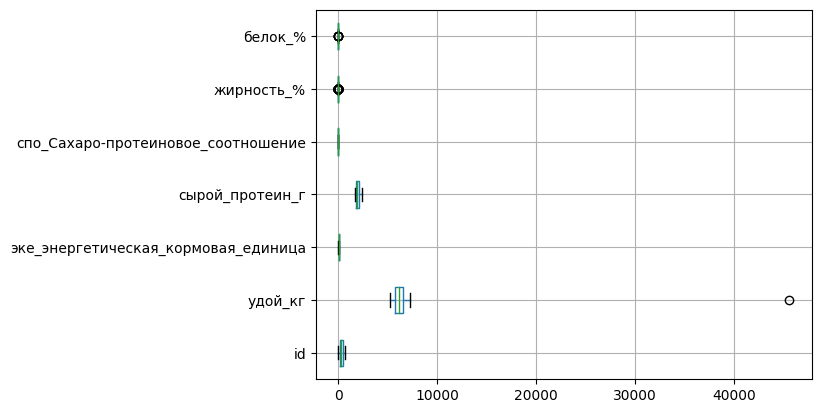

In [40]:
cow_1.boxplot(vert = False)

In [41]:
cow_1[cow_1['удой_кг'] > 10000]

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
16  17    45616                                 11.5             1675   

    спо_Сахаро-протеиновое_соотношение          порода тип_пастбища  \
16                                0.93  вис бик айдиал    холмистое   

   порода_папы_быка  жирность_%  белок_% вкус_молока      возраст  
16           айдиал        3.22    3.076      вкусно  более_2_лет

In [42]:
cow_1 = cow_1[cow_1['удой_кг'] < 45616]
cow_1.head(20)

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0    1     5863                                 14.2             1743   
1    2     5529                                 12.8             2138   
2    3     5810                                 14.0             1854   
3    4     5895                                 12.4             2012   
4    5     5302                                 12.8             1675   
5    6     5254                                 12.7             1806   
6    7     5910                                 13.2             1792   
7    8     6179                                 14.7             1806   
8    9     6783                                 14.2             1918   
9   10     5339                                 13.4             1791   
10  11     5591                                 13.7             1678   
11  12     6563                                 16.5             2328   
12  13     6173                                 15.4             2193   
13  14     6131                                 14.5             1766   
14  15     6014                                 16.0             1769   
15  16     6518                                 15.6             1747   
17  18     5777                                 12.4             1873   
18  19     6461                                 15.7             2159   
19  20     5698                                 14.3             1759   
20  21     6752                                 15.5             1924   

    спо_Сахаро-протеиновое_соотношение           порода тип_пастбища  \
0                                0.890   вис бик айдиал    равнинное   
1                                0.890   вис бик айдиал    равнинное   
2                                0.885  рефлешнсоверинг    холмистое   
3                                0.885  рефлешнсоверинг    холмистое   
4                                0.885   вис бик айдиал    равнинное   
5                                0.885  рефлешнсоверинг    холмистое   
6                                0.885   вис бик айдиал    равнинное   
7                                0.930   вис бик айдиал    равнинное   
8                                0.940  рефлешнсоверинг    холмистое   
9                                0.895   вис бик айдиал    холмистое   
10                               0.895  рефлешнсоверинг    холмистое   
11                               0.930   вис бик айдиал    холмистое   
12                               0.930  рефлешнсоверинг    холмистое   
13                               0.930  рефлешнсоверинг    равнинное   
14                               0.930   вис бик айдиал    равнинное   
15                               0.930   вис бик айдиал    равнинное   
17                               0.895   вис бик айдиал    холмистое   
18                               0.930  рефлешнсоверинг    холмистое   
19                               0.895  рефлешнсоверинг    холмистое   
20                               0.930  рефлешнсоверинг    холмистое   

   порода_папы_быка  жирность_%  белок_% вкус_молока      возраст  
0            айдиал        3.58    3.076      вкусно  более_2_лет  
1           соверин        3.54    3.079      вкусно  менее_2_лет  
2           соверин        3.59    3.074   не вкусно  более_2_лет  
3            айдиал        3.40    3.075   не вкусно  более_2_лет  
4           соверин        3.73    3.073      вкусно  менее_2_лет  
5           соверин        3.13    3.078      вкусно  менее_2_лет  
6           соверин        3.48    3.077      вкусно  более_2_лет  
7            айдиал        3.55    3.076      вкусно  более_2_лет  
8            айдиал        3.71    3.077      вкусно  более_2_лет  
9           соверин        3.13    3.075      вкусно  менее_2_лет  
10           айдиал        3.13    3.075      вкусно  менее_2_лет  
11          соверин        3.71    3.075      вкусно  более_2_лет  
12          соверин        3.72    3.075      вкусно  более_2_лет  
13   

<AxesSubplot:>

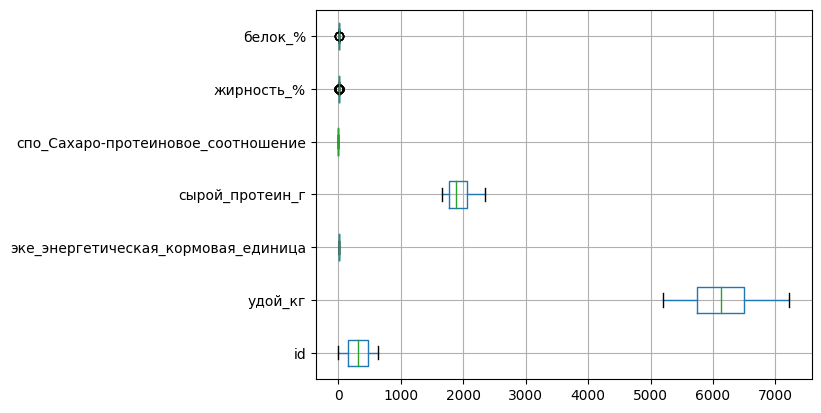

In [43]:
cow_1.boxplot(vert = False)

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Проводим анализ данных таблицы cow_1.
</div>

In [44]:
def descrebes(a,b,c,d,):
    a.describe()
    a.hist()
    df.title(b)
    df.xlabel(c)
    df.ylabel(d)
    df.show()
def boxplots(a,b,c,d,f):
    a.boxplot(b) 
    df.title(c)
    df.xlabel(d)
    df.ylabel(f)
    df.show()

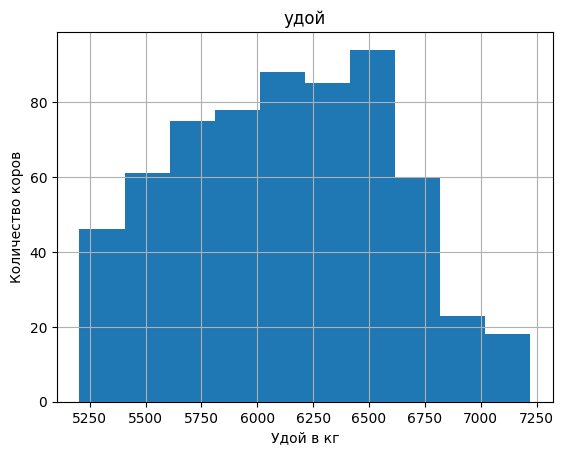

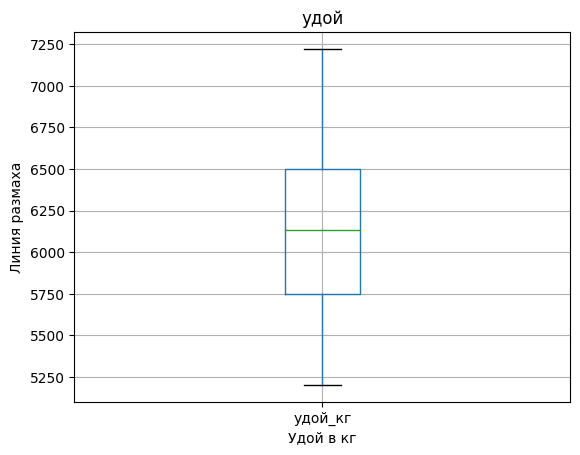

In [45]:
descrebes(cow_1['удой_кг'],"удой","Удой в кг","Количество коров")
boxplots(cow_1, 'удой_кг',"удой","Удой в кг","Линия размаха")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Средний удой составляет - 6125 кг. В основном удой варируется от 5749 кг. до 6501 кг. 
</div>

<div class="alert alert-info">
<b>Коментарий на рекомендацию:</b>
<br>Сделал две фенкции. Спасибо за совет.
</div>

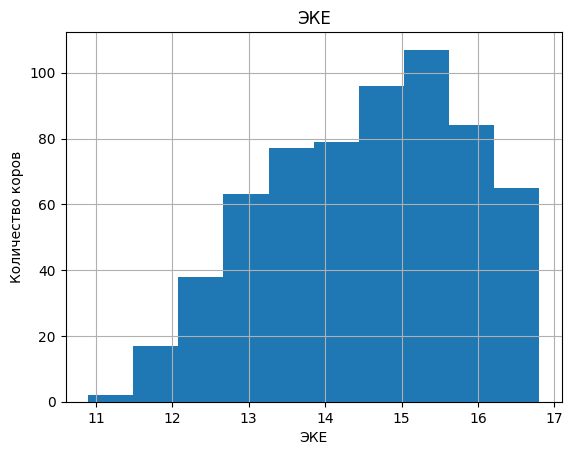

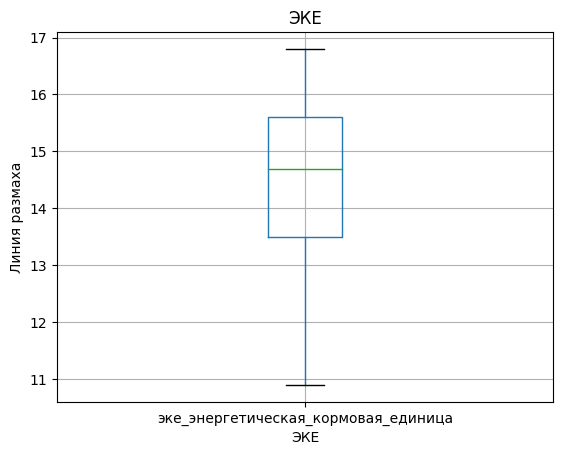

In [46]:
descrebes(cow_1['эке_энергетическая_кормовая_единица'],"ЭКЕ","ЭКЕ","Количество коров")
boxplots(cow_1, 'эке_энергетическая_кормовая_единица',"ЭКЕ","ЭКЕ","Линия размаха")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Среднее значение ЭКЕ составляет - 14,5. В основном значения ЭКЕ варируется от 13,5. до 15,6 
</div>

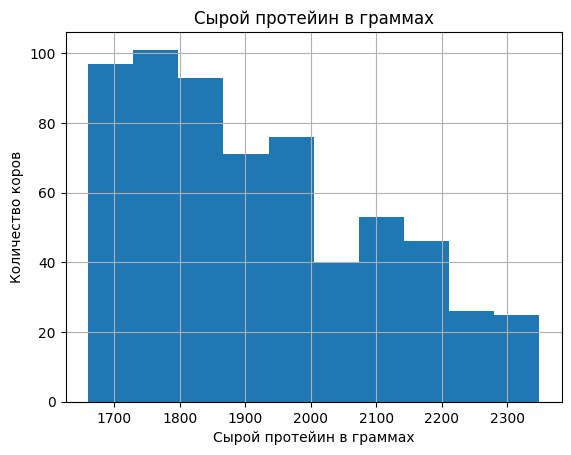

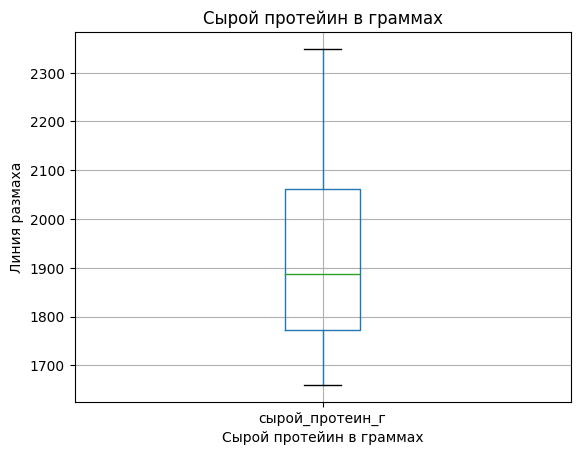

In [47]:
descrebes(cow_1['сырой_протеин_г'],"Сырой протейин в граммах","Сырой протейин в граммах","Количество коров")
boxplots(cow_1, 'сырой_протеин_г',"Сырой протейин в граммах","Сырой протейин в граммах", "Линия размаха")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Среднее значение сырого протеина - 1923,76г. В основном значения сырого протеина варируется от 1770,75 г. до 2062,25 г.
</div>

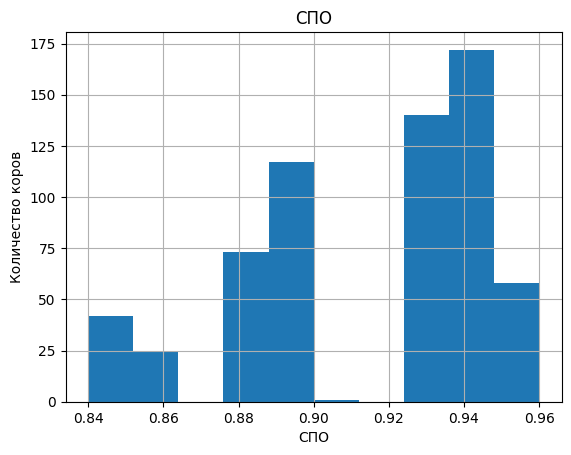

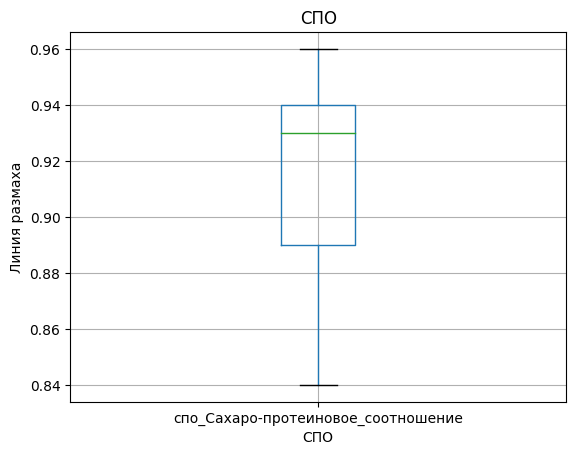

In [48]:
descrebes(cow_1['спо_Сахаро-протеиновое_соотношение'],"СПО","СПО","Количество коров")
boxplots(cow_1, 'спо_Сахаро-протеиновое_соотношение',"СПО","СПО", "Линия размаха")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Среднее значение СПО - 0,91 В основном значения СПО варируется от 0,89 до 0,94. Чаще всего СПО встречается на промежутке от 93,8 до 94,4
</div>

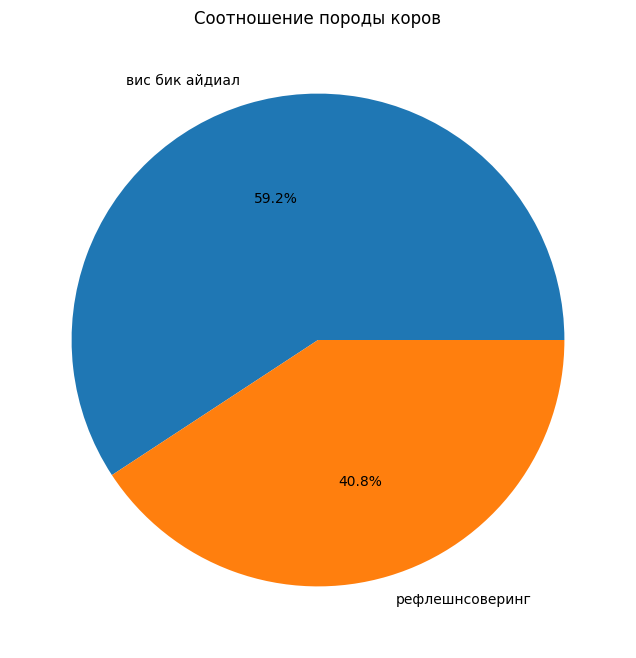

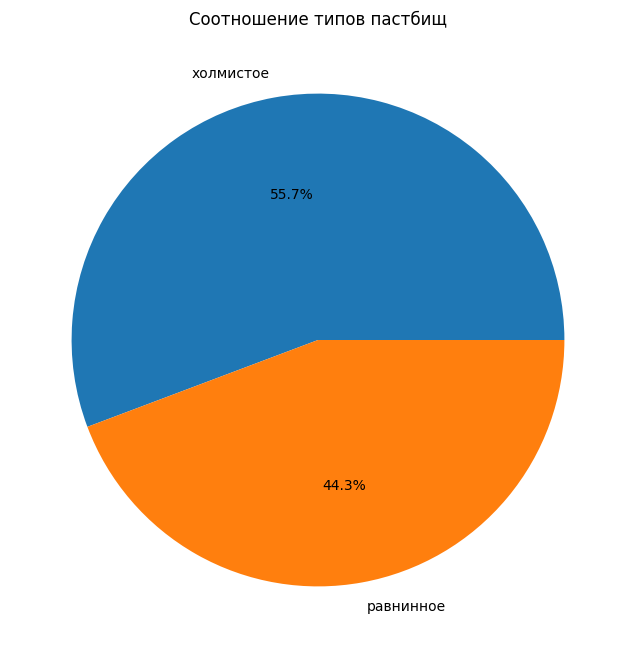

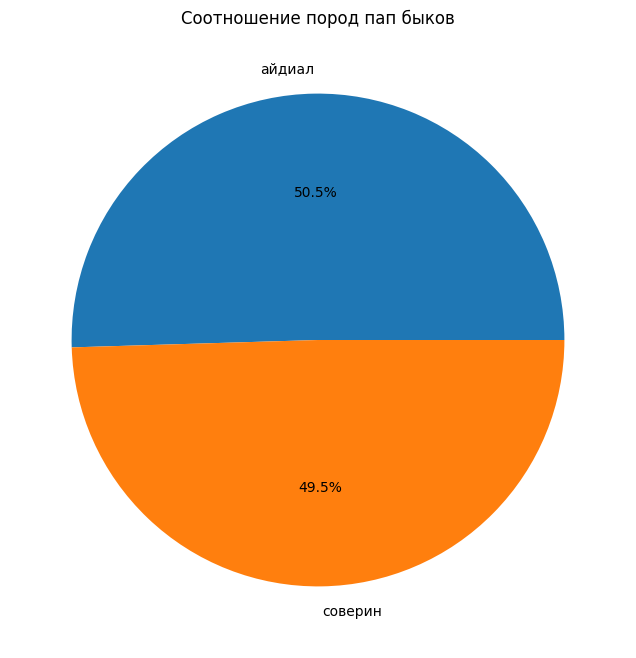

In [49]:
cow_1['порода'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
df.title("Соотношение породы коров")
df.ylabel("")
df.show()

cow_1['тип_пастбища'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
df.title("Соотношение типов пастбищ")
df.ylabel("")
df.show()

cow_1['порода_папы_быка'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
df.title("Соотношение пород пап быков")
df.ylabel("")
df.show()

<div class="alert alert-info">
<b>Вывод:</b>
<br>Коров породы рефлешнсоверинг почти на 10% больше чем коров породы рефлешнсоверинг.
<br>Коров которые кормились на холмистых пастбищах почти на 10% больше чем коров которые паслись на равнинах.
<br>Соотношение породы пап быков равнозначное.
</div>

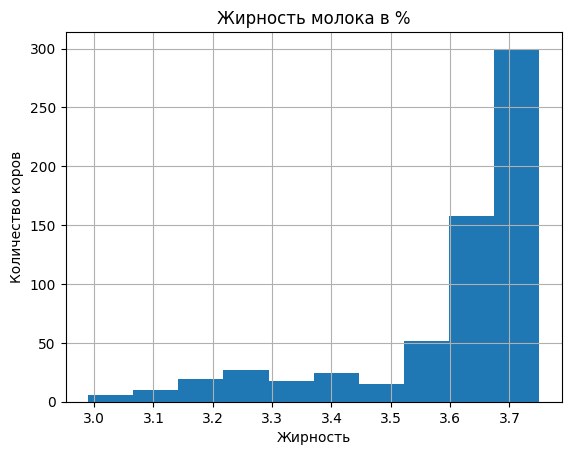

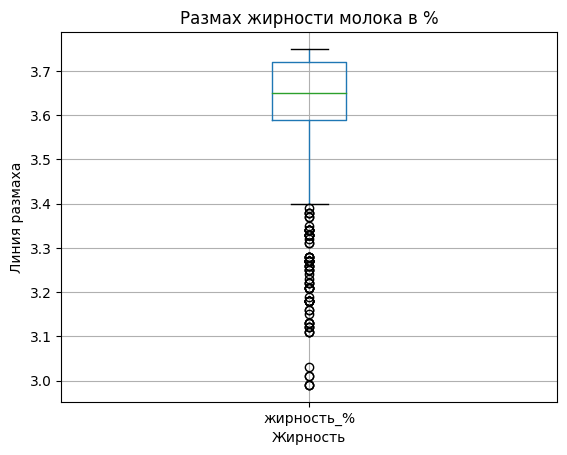

In [50]:
descrebes(cow_1['жирность_%'],"Жирность молока в %","Жирность","Количество коров")
boxplots(cow_1, 'жирность_%',"Размах жирности молока в %","Жирность","Линия размаха")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Средняя жирность молока составляет - 3,6% В основном значение жирности варируется от 3,68% до 3,75% Размах показывается что значения ниже 3,4% могут быть аномальными. 
</div>

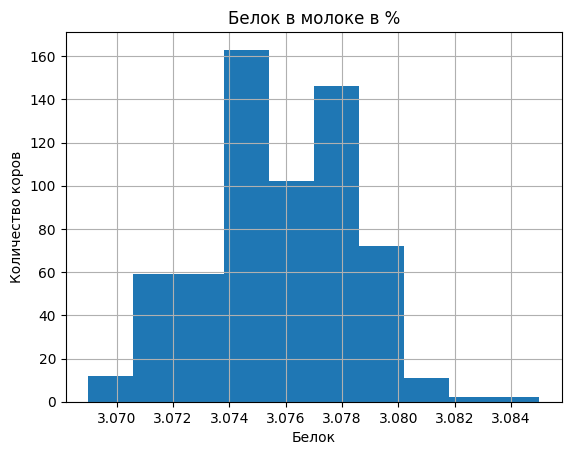

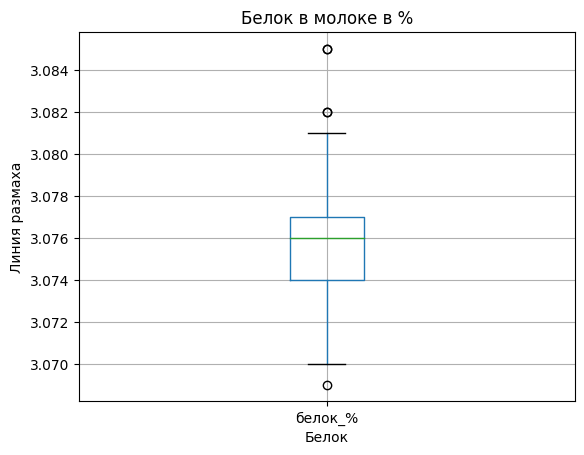

In [51]:
descrebes(cow_1['белок_%'],"Белок в молоке в %","Белок","Количество коров")
boxplots(cow_1, 'белок_%',"Белок в молоке в %","Белок","Линия размаха")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Среднее значения белка в молоке составляет - 3,07% Чаще всего процент беслка варируется от 3% до 3,75% и от 3,77% до 3,78% Размах показывает что значения меньше 3.070% и больше 3,081% могут быть аномалиями.
</div>

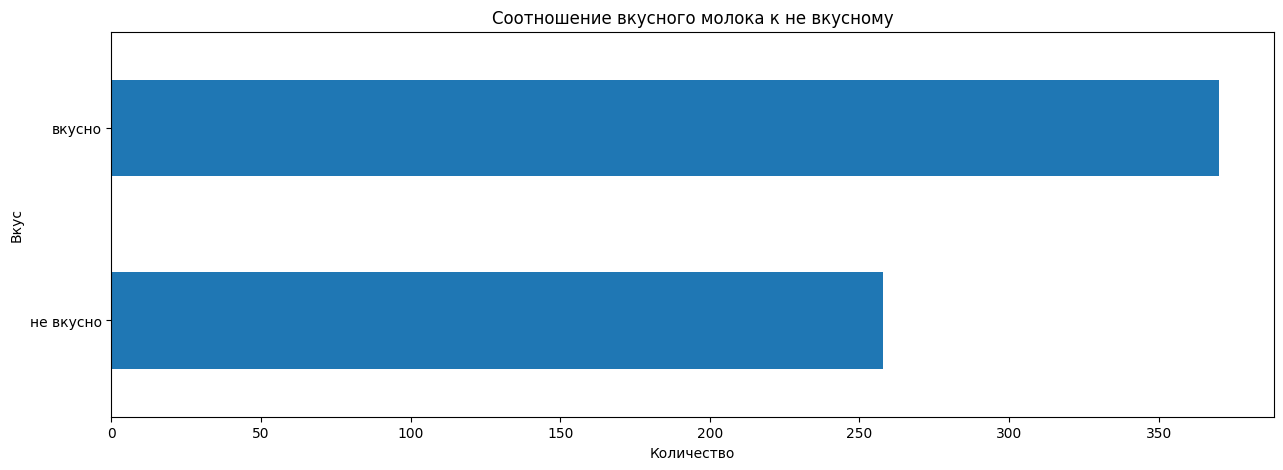

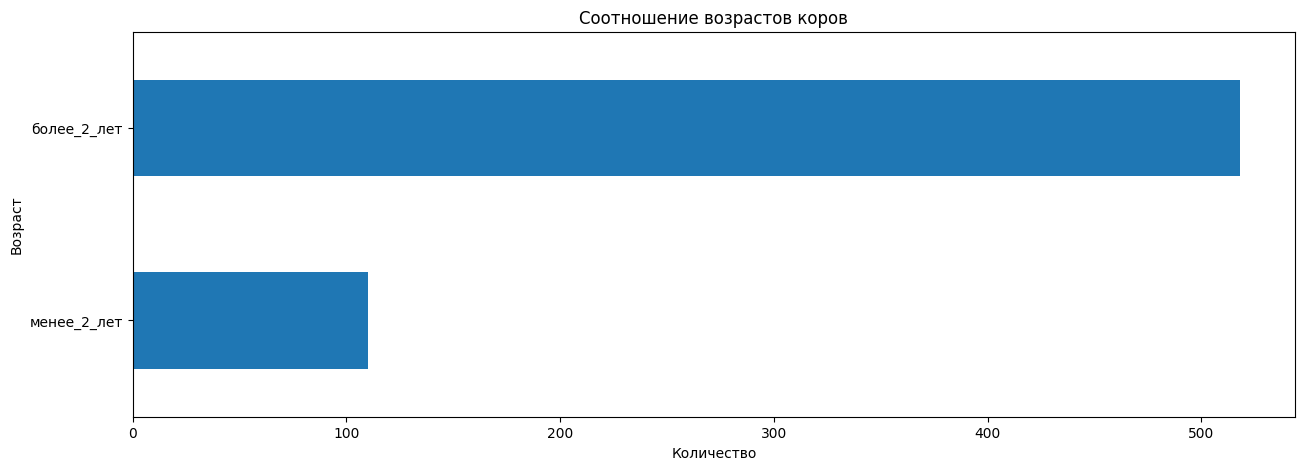

In [52]:
cow_1['вкус_молока'].value_counts(ascending= True).plot(kind= 'barh',figsize= (15,5),title= "Соотношение вкусного молока к не вкусному",)
plt.xlabel('Количество')
plt.ylabel('Вкус')
plt.show()

cow_1['возраст'].value_counts(ascending= True).plot(kind= 'barh',figsize= (15,5),title= "Соотношение возрастов коров",)
plt.xlabel('Количество')
plt.ylabel('Возраст')
plt.show()

<div class="alert alert-info">
<b>Коментарий на рекомендацию:</b>
<br>Разнообразил.
</div>

<div class="alert alert-info">
<b>Вывод:</b>
<br>Вкусного по мнению фермара молока оказалось на 10% больше нежели не вкусного.
<br>82,5% коров в стаде фермера старше 2х лет.
</div>

In [53]:
cow_3.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   вис бик айдиал    холмистое           айдиал  геркулес   
1   вис бик айдиал    равнинное          соверин    буйный   
2  рефлешнсоверинг    равнинное          соверин     барин   
3  рефлешнсоверинг    холмистое           айдиал    буйный   
4  рефлешнсоверинг    равнинное           айдиал    буйный   

   текущая_жирность_%  текущий_уровень_белок_%      возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Смотрим наличие аномальных значений в числовых данных. При наличии удаляем их.
</div>

<AxesSubplot:>

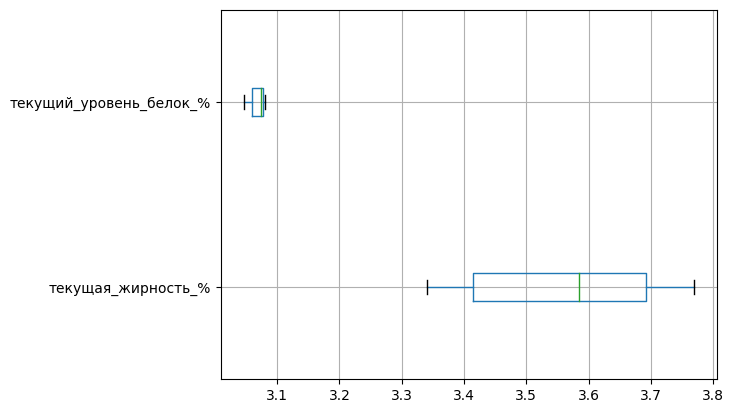

In [54]:
cow_3.boxplot(vert = False)

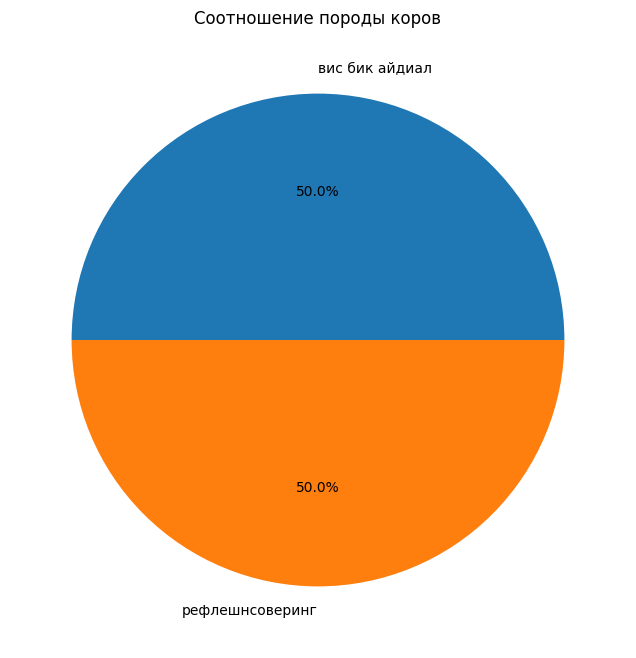

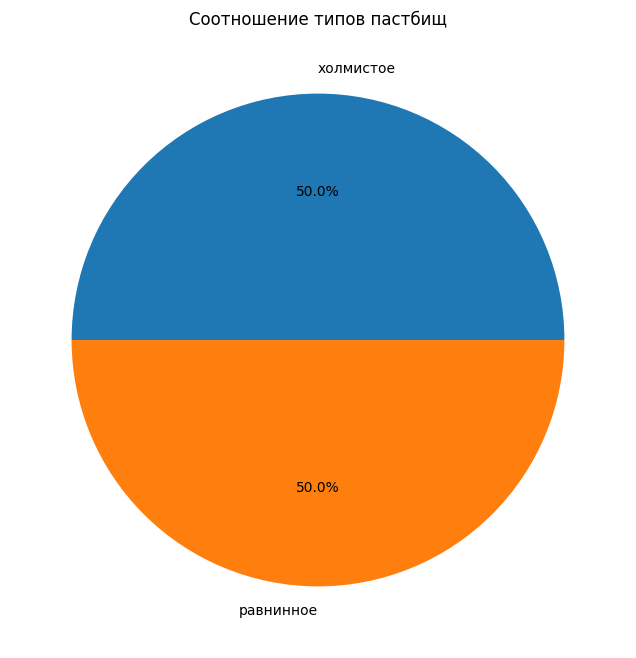

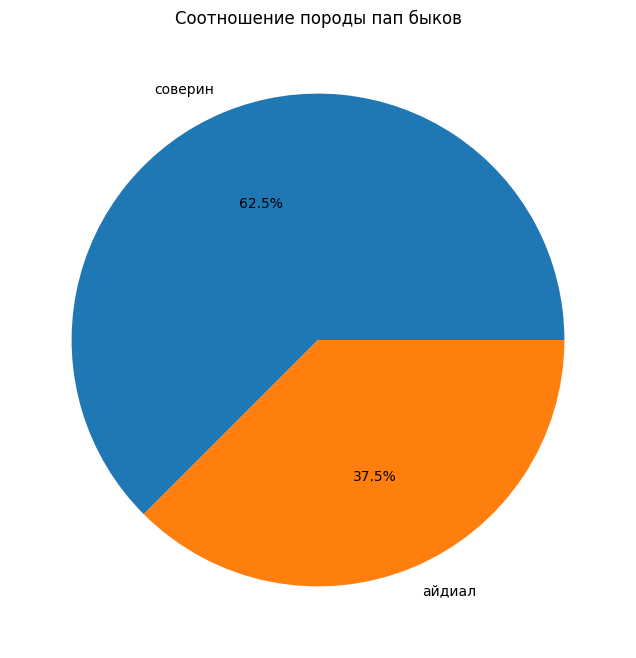

In [55]:
cow_3['порода'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
df.title("Соотношение породы коров")
df.ylabel("")
df.show()

cow_3['тип_пастбища'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
df.title("Соотношение типов пастбищ")
df.ylabel("")
df.show()

cow_3['порода_папы_быка'].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
df.title("Соотношение породы пап быков")
df.ylabel("")
df.show()

<div class="alert alert-info">
<b>Вывод:</b>
<br>Соотношение породы быков и типов пастбищь равномерное. 
<br>Соотношение породы пап быков соверин 62,5% против 37,5% айдала.
</div>

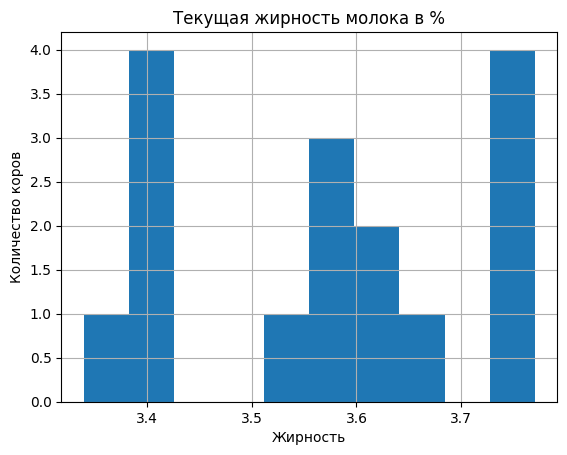

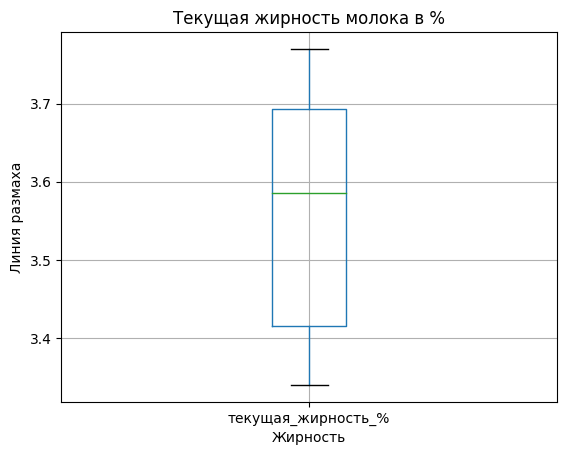

In [56]:
descrebes(cow_3['текущая_жирность_%'],"Текущая жирность молока в %","Жирность","Количество коров")
boxplots(cow_3, 'текущая_жирность_%',"Текущая жирность молока в %","Жирность","Линия размаха")

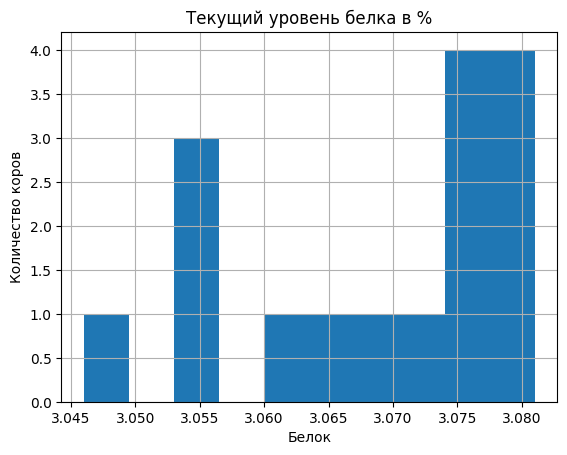

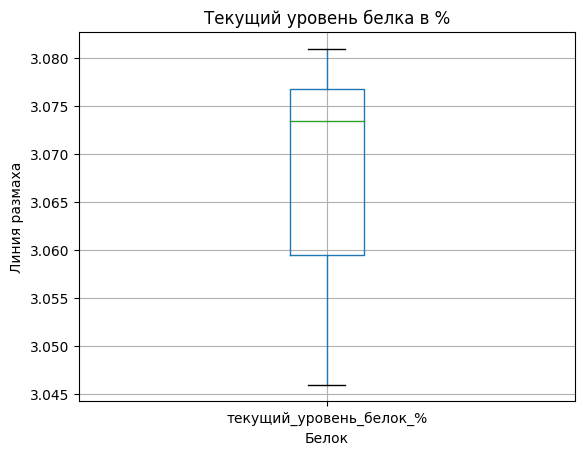

In [57]:
descrebes(cow_3['текущий_уровень_белок_%'],"Текущий уровень белка в %","Белок","Количество коров")
boxplots(cow_3, 'текущий_уровень_белок_%',"Текущий уровень белка в %","Белок","Линия размаха")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Текущий уровень белка в молоке составляет в среднем 3%. Чаще всего уровень белка находиться в районе от 3,074% до 3,081%
</div>

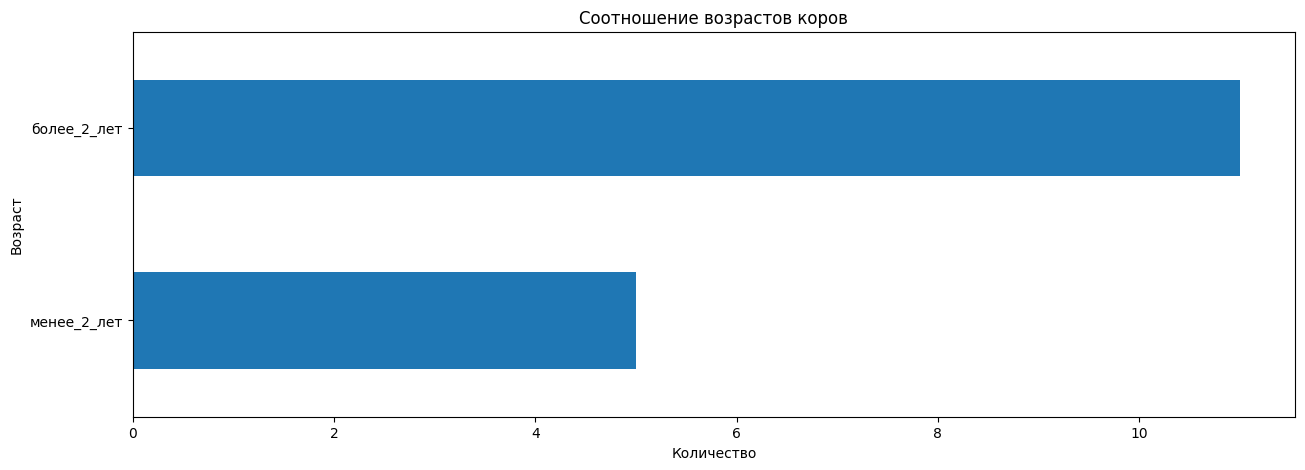

In [58]:
cow_3['возраст'].value_counts(ascending= True).plot(kind= 'barh',figsize= (15,5),title= "Соотношение возрастов коров",)
plt.xlabel('Количество')
plt.ylabel('Возраст')
plt.show()

<div class="alert alert-info">
<b>Вывод:</b>
<br>68,8% коров старше 2х лет.
</div>

<div class="alert alert-info">
<b>Вывод главы:</b>
<br>68,8% коров старше 2х лет.
</div>

## Корреляционный анализ

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Смотрим кореляцию в числовом виде и в виде гистограмм.
</div>

In [59]:
cow_1.corr()

id   удой_кг  \
id                                   1.000000 -0.006816   
удой_кг                             -0.006816  1.000000   
эке_энергетическая_кормовая_единица -0.028600  0.765098   
сырой_протеин_г                     -0.035613  0.446731   
спо_Сахаро-протеиновое_соотношение  -0.064803  0.806339   
жирность_%                           0.017126  0.600902   
белок_%                              0.002547  0.002966   

                                     эке_энергетическая_кормовая_единица  \
id                                                             -0.028600   
удой_кг                                                         0.765098   
эке_энергетическая_кормовая_единица                             1.000000   
сырой_протеин_г                                                 0.387875   
спо_Сахаро-протеиновое_соотношение                              0.749007   
жирность_%                                                      0.637279   
белок_%                                                        -0.008939   

                                     сырой_протеин_г  \
id                                         -0.035613   
удой_кг                                     0.446731   
эке_энергетическая_кормовая_единица         0.387875   
сырой_протеин_г                             1.000000   
спо_Сахаро-протеиновое_соотношение          0.446332   
жирность_%                                  0.357793   
белок_%                                     0.226802   

                                     спо_Сахаро-протеиновое_соотношение  \
id                                                            -0.064803   
удой_кг                                                        0.806339   
эке_энергетическая_кормовая_единица                            0.749007   
сырой_протеин_г                                                0.446332   
спо_Сахаро-протеиновое_соотношение                             1.000000   
жирность_%                                                     0.629098   
белок_%                                                        0.073718   

                                     жирность_%   белок_%  
id                                     0.017126  0.002547  
удой_кг                                0.600902  0.002966  
эке_энергетическая_кормовая_единица    0.637279 -0.008939  
сырой_протеин_г                        0.357793  0.226802  
спо_Сахаро-протеиновое_соотношение     0.629098  0.073718  
жирность_%                             1.000000 -0.026542  
белок_%                               -0.026542  1.000000

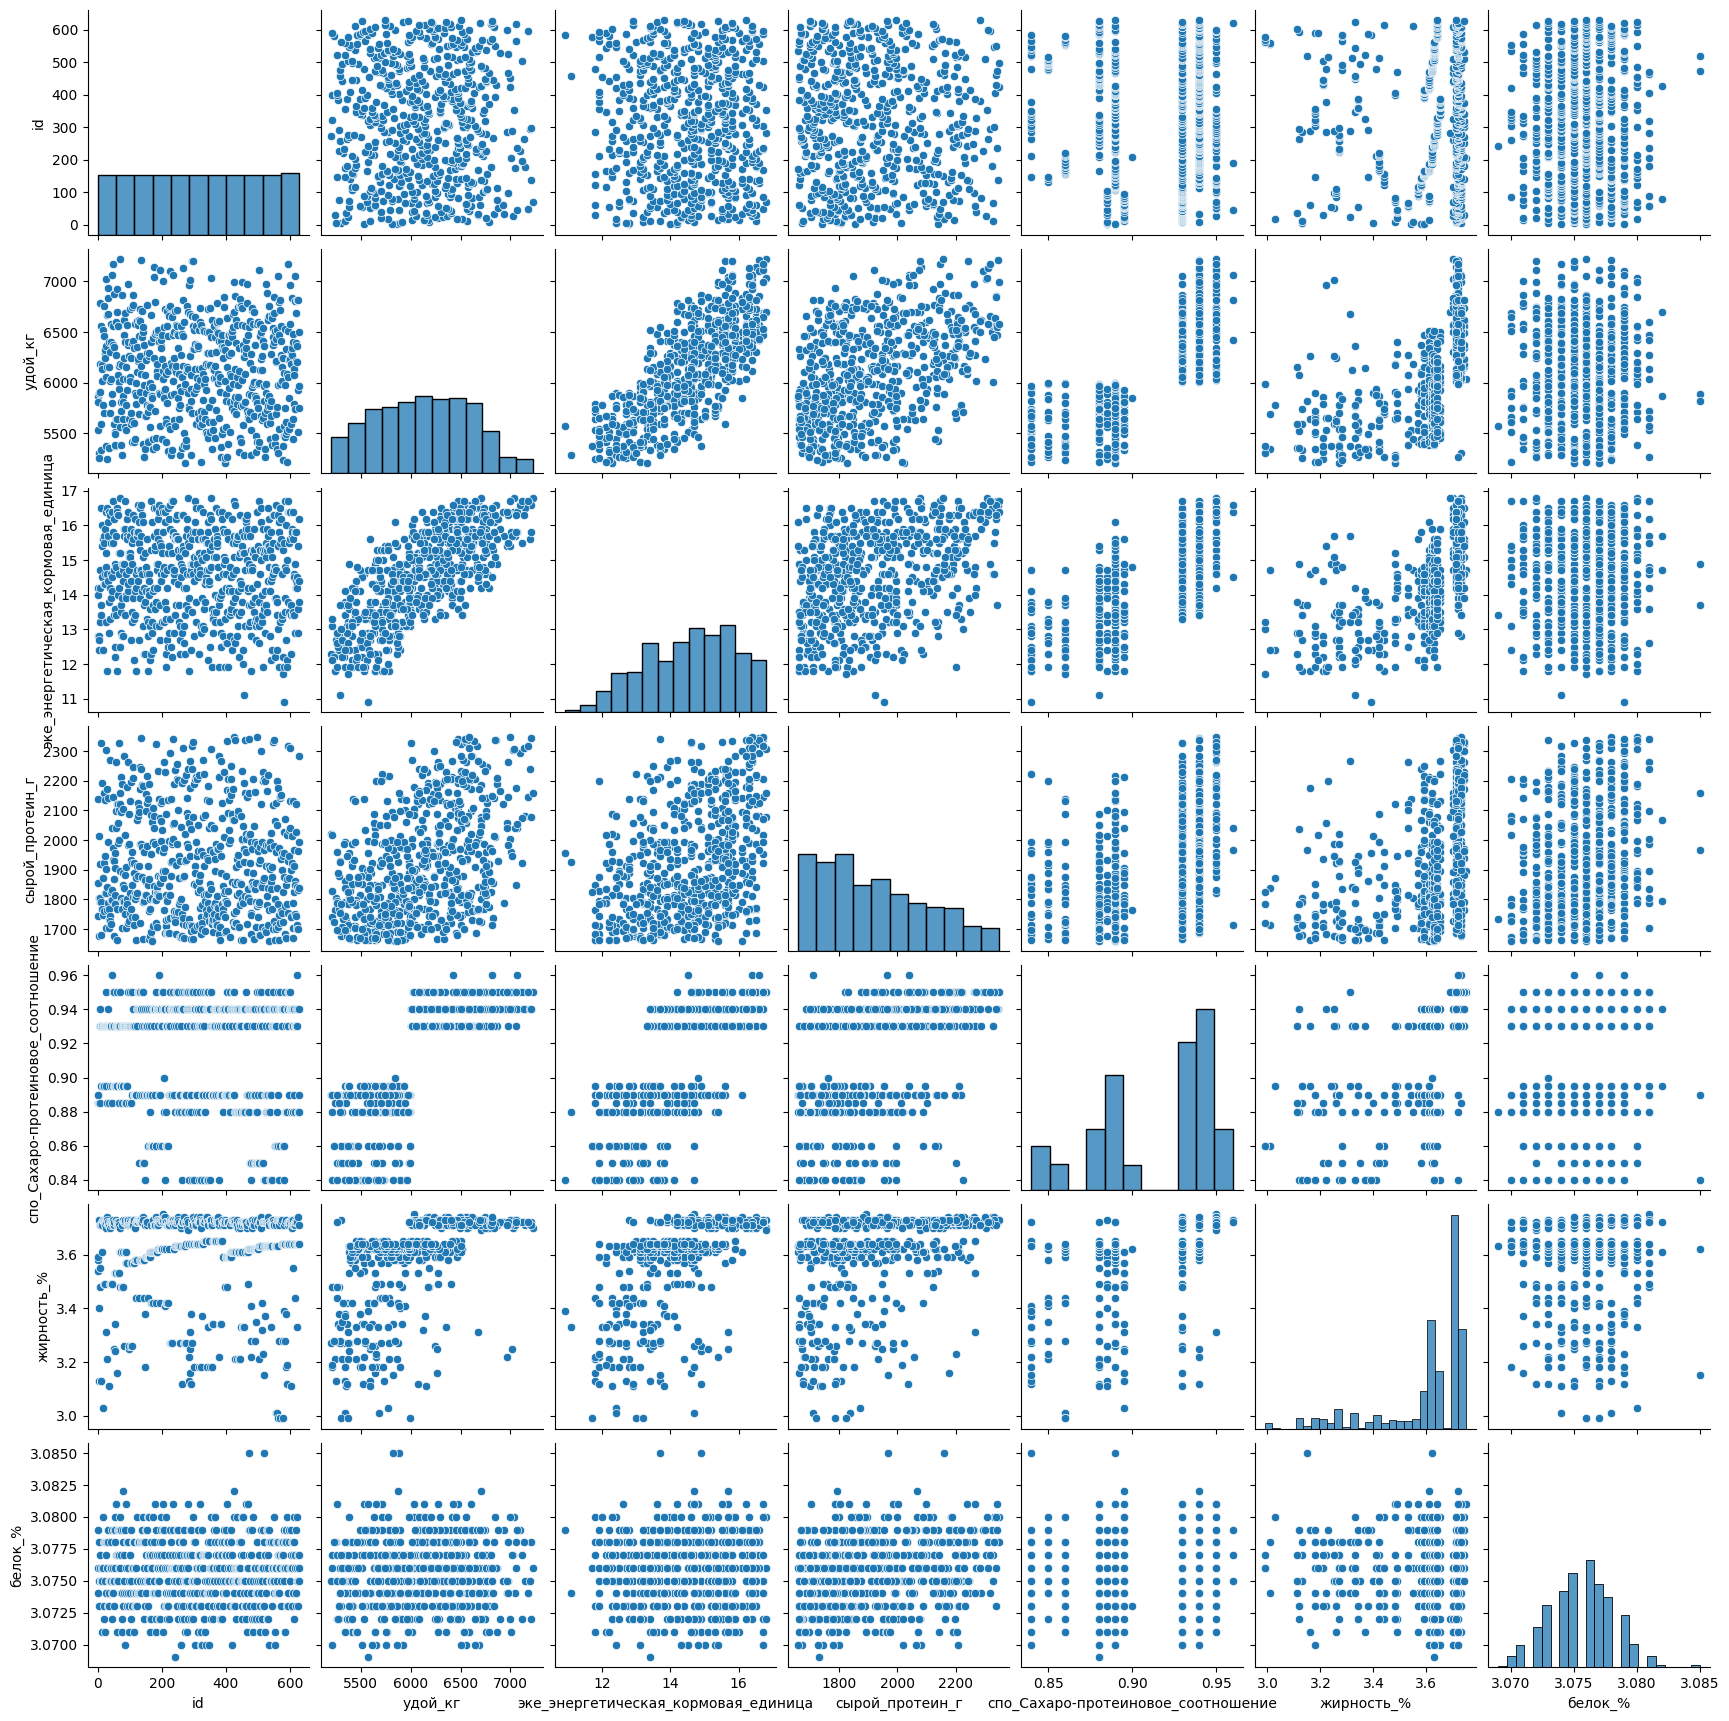

In [60]:
sns.pairplot(cow_1, kind='scatter')

<div class="alert alert-info">
<b>Вывод:</b>
<br>Явно заметна корреляция между удоем и другими числовыми признаками. А также между, жирностью и ЭКЕ, ЭКЕ и СПО. 
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Смотрим диаграммы рассеяния.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='удой_кг'>

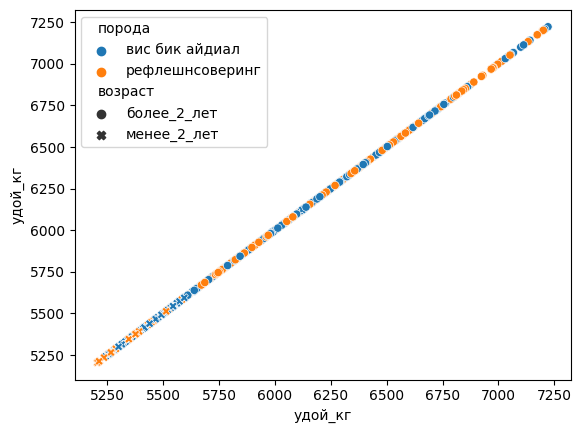

In [61]:
sns.scatterplot(data=cow_1,x="удой_кг",y="удой_кг",hue="порода",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>У коров породы рефлешнсоверинг удой больше.  
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='эке_энергетическая_кормовая_единица'>

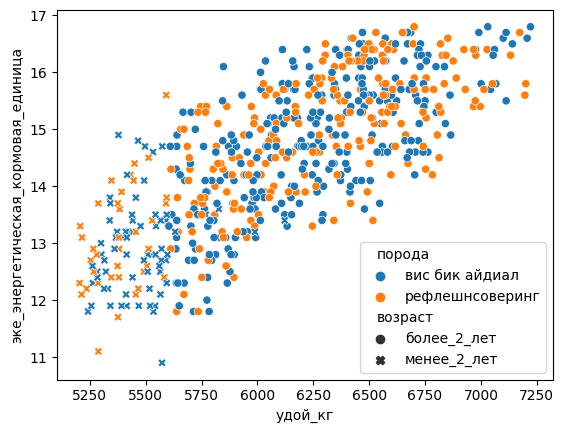

In [62]:
sns.scatterplot(data=cow_1,x="удой_кг",y="эке_энергетическая_кормовая_единица",hue="порода",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Порода коровы никак не вляет на ЭКЕ. На ЭКЕ влияет лишь возраст коровы, у коров с возрастом меньше 2х лет значение ЭКЕ куда меньше. Так-же видно как удой влияет на удой влияет на значения ЭКЕ, чем больше удой тем больше ЭКЕ. 
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='сырой_протеин_г'>

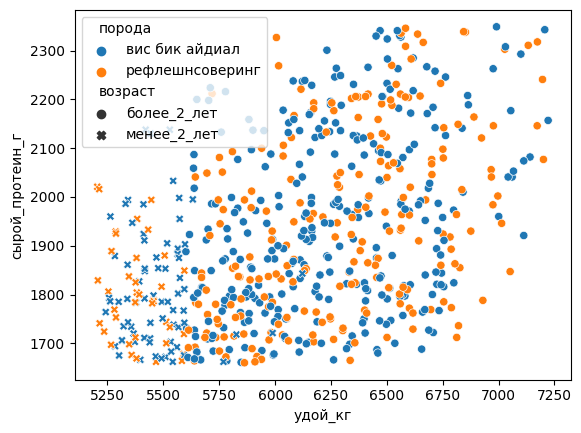

In [63]:
sns.scatterplot(data=cow_1,x="удой_кг",y="сырой_протеин_г",hue="порода",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Порода коровы никак не вляет на значение сырого протеина в молоке. Удой тоже не сильно влияет на количество сырого протеина. Возраст коровы так-же не влияет на значения сырого протеина.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='спо_Сахаро-протеиновое_соотношение'>

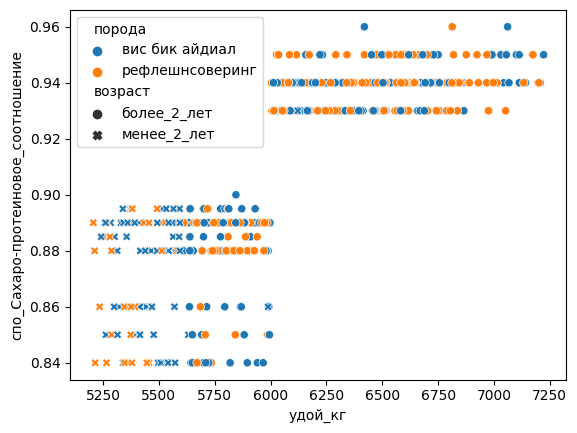

In [64]:
sns.scatterplot(data=cow_1,x="удой_кг",y="спо_Сахаро-протеиновое_соотношение",hue="порода",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Коровы породы рефлешнсоверинг содержат больше СПО. Удой так-же влияет на это соотношение. Интересно выглядит график для коров возрастом до 2х лет. На СПО там больше влияет коровы породы вис бик айдиал. возможно на это влияет малое количество коров породы рефлешнсоверинг. 
</div>

In [65]:
v = cow_1[cow_1['порода'] == 'вис бик айдиал']
r = cow_1[cow_1['порода'] == 'рефлешнсоверинг']

<AxesSubplot:>

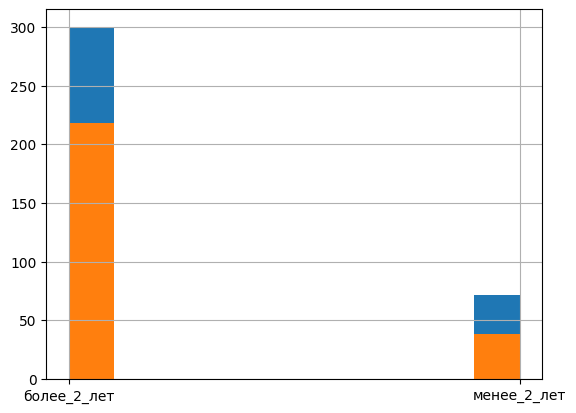

In [66]:
v['возраст'].hist()
r['возраст'].hist()

<div class="alert alert-info">
<b>Вывод:</b>
<br> Коров породы  рефлешнсоверинг почти в два раза меньше. Что может негативно сказываться на точности результатов графика выше.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='жирность_%'>

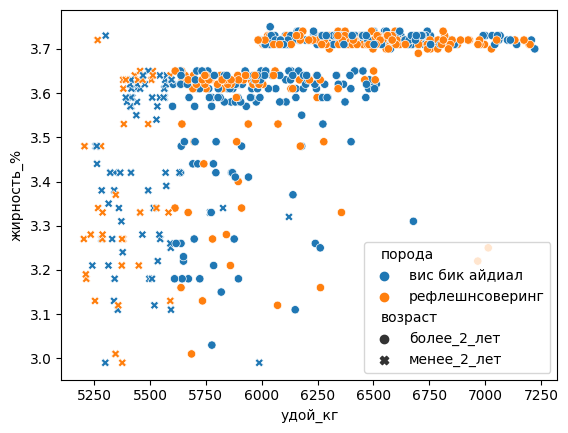

In [67]:
sns.scatterplot(data=cow_1,x="удой_кг",y="жирность_%",hue="порода",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br> Коровы породы рефлешнсоверинг имеют больший процент жирности в молоке. 
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='белок_%'>

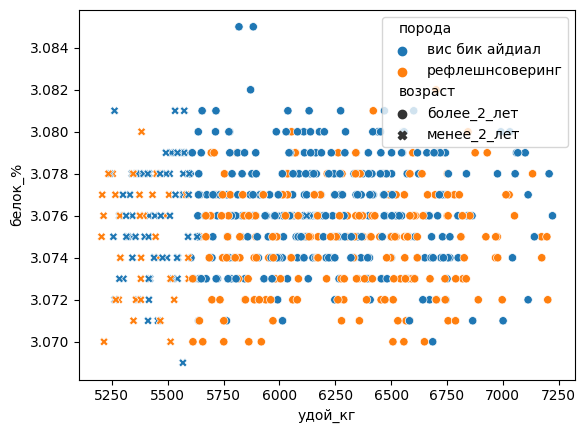

In [68]:
sns.scatterplot(data=cow_1,x="удой_кг",y="белок_%",hue="порода",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br> Коровы породы вис бик айдиал имеют больший процент белка в молоке. 
</div>

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Породы двух коров практически не отличаются по разным показателям.  
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='удой_кг'>

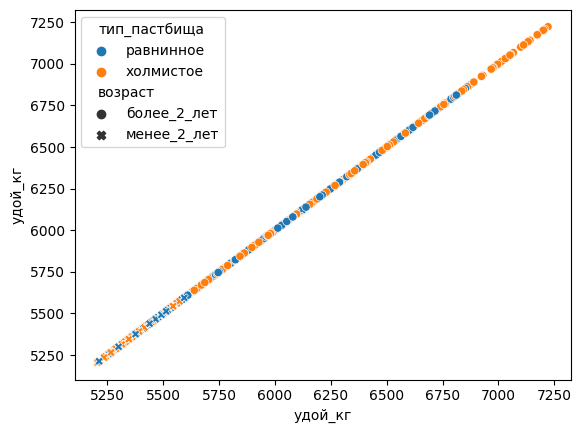

In [69]:
sns.scatterplot(data=cow_1,x="удой_кг",y="удой_кг",hue="тип_пастбища",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br> Коровы которые паслись на холмах дают больше молока чем те коровы которые паслись на равнинах. 
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='эке_энергетическая_кормовая_единица'>

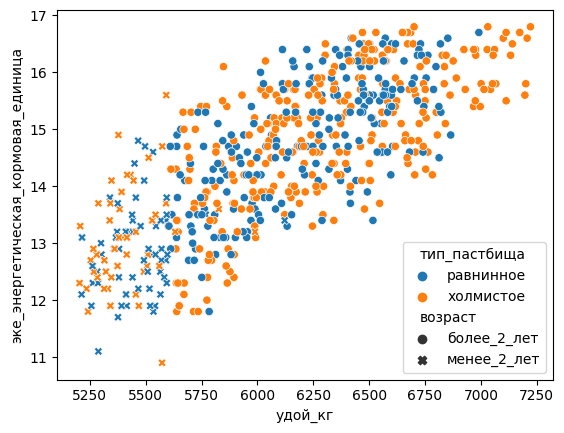

In [70]:
sns.scatterplot(data=cow_1,x="удой_кг",y="эке_энергетическая_кормовая_единица",hue="тип_пастбища",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br> У коров которые пасуться на холмистых местностях показатель ЭКЕ больше. 
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='сырой_протеин_г'>

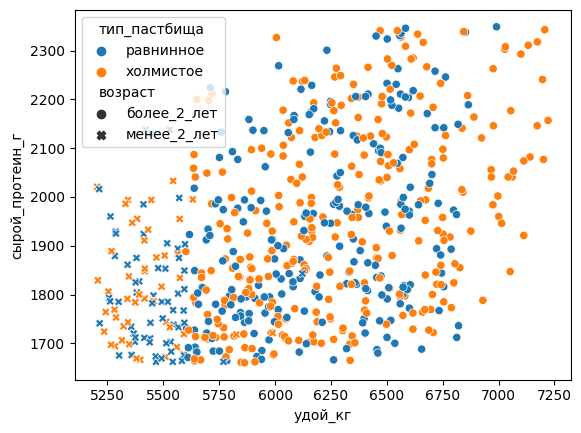

In [71]:
sns.scatterplot(data=cow_1,x="удой_кг",y="сырой_протеин_г",hue="тип_пастбища",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br> У коров которые пасуться на холмистых местностях показатель протеина и особенно значение удоя больше. 
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='спо_Сахаро-протеиновое_соотношение'>

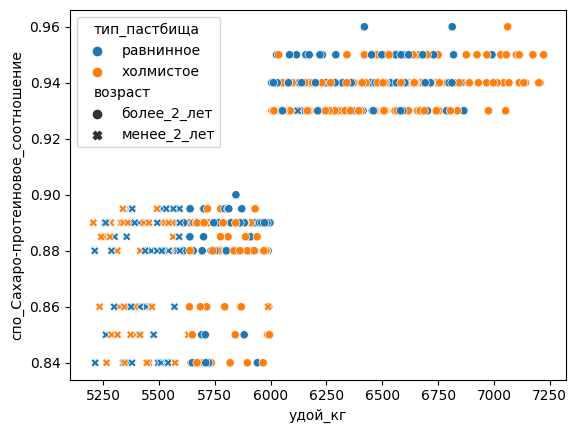

In [72]:
sns.scatterplot(data=cow_1,x="удой_кг",y="спо_Сахаро-протеиновое_соотношение",hue="тип_пастбища",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Как и ранее у коров которые пасуться на холмистых местностях показатель СПО и значение удоя больше. 
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='жирность_%'>

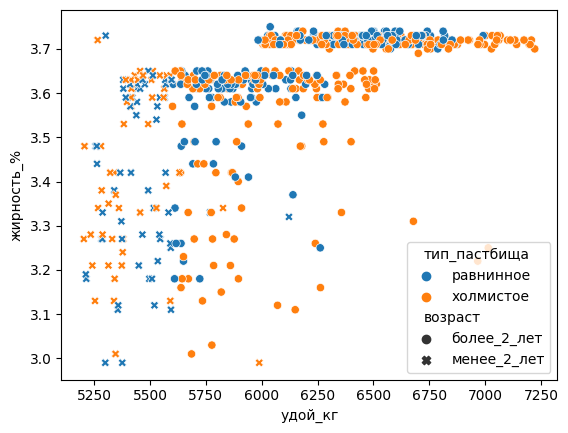

In [73]:
sns.scatterplot(data=cow_1,x="удой_кг",y="жирность_%",hue="тип_пастбища",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Как и ранее у коров которые пасуться на холмистых местностях показатель жирности в молоке и значение удоя больше. 
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='белок_%'>

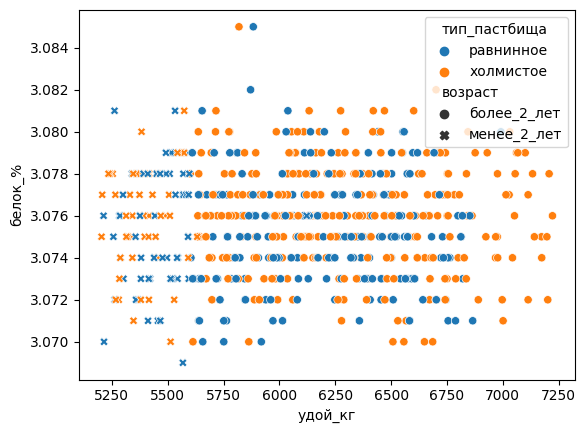

In [74]:
sns.scatterplot(data=cow_1,x="удой_кг",y="белок_%",hue="тип_пастбища",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Тип пастбища практически не влияет на жирность молока.
</div>

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Молоко коров которые паслись на холмистых пастбищах превосходит почти по всем значениям молоко коров которые паслись на равнинах.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='удой_кг'>

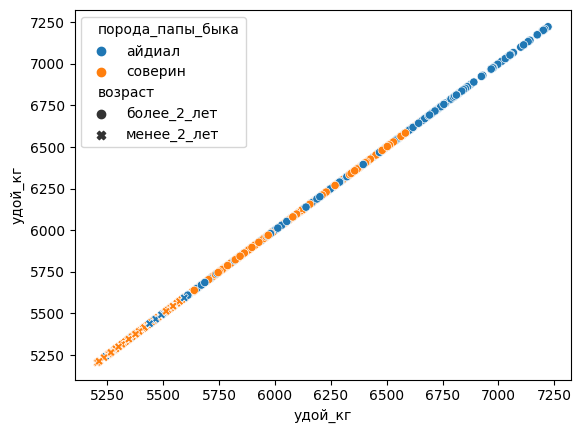

In [75]:
sns.scatterplot(data=cow_1,x="удой_кг",y="удой_кг",hue="порода_папы_быка",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br> Коровы отец которых был породы айдал дают больше молока нежели коровы у которых отец был породы соверин 
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='эке_энергетическая_кормовая_единица'>

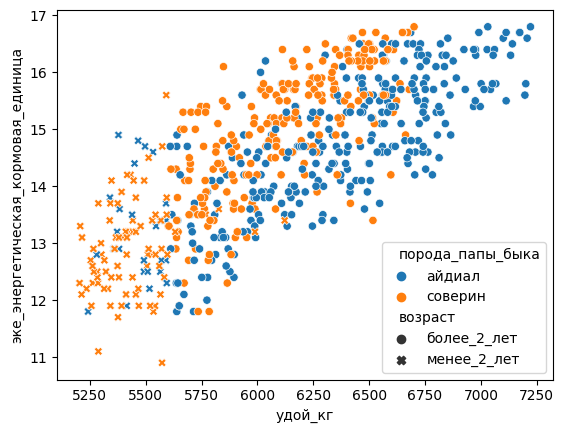

In [76]:
sns.scatterplot(data=cow_1,x="удой_кг",y="эке_энергетическая_кормовая_единица",hue="порода_папы_быка",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Порода папы быка не сильно влияет на показатель ЭКЕ.

<AxesSubplot:xlabel='удой_кг', ylabel='сырой_протеин_г'>

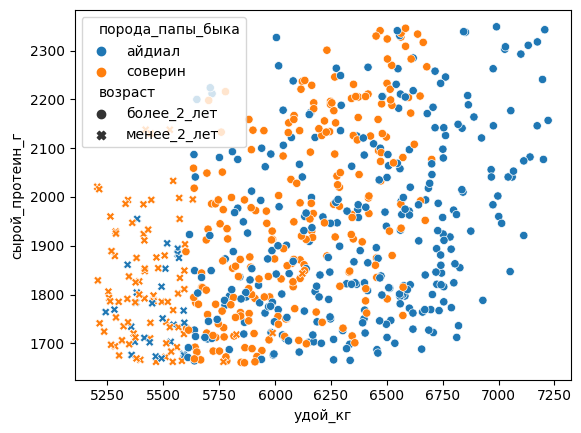

In [77]:
sns.scatterplot(data=cow_1,x="удой_кг",y="сырой_протеин_г",hue="порода_папы_быка",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Порода папы быка не сильно влияет на показатель сырого протеина.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='спо_Сахаро-протеиновое_соотношение'>

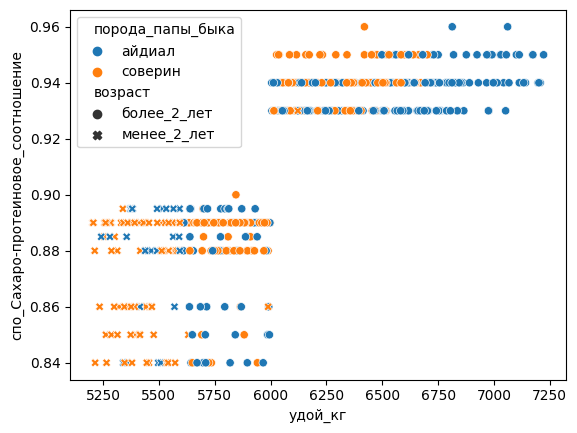

In [78]:
sns.scatterplot(data=cow_1,x="удой_кг",y="спо_Сахаро-протеиновое_соотношение",hue="порода_папы_быка",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Порода папы быка не сильно влияет на показатель СПО.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='жирность_%'>

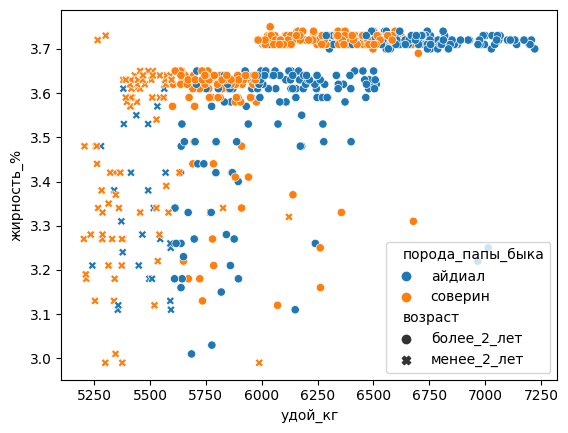

In [79]:
sns.scatterplot(data=cow_1,x="удой_кг",y="жирность_%",hue="порода_папы_быка",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Порода папы быка не сильно влияет на показатель жирности.
</div>

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Коровы у которых отец был породы айдал дают больше молоко но ничем другим не отличаются.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='удой_кг'>

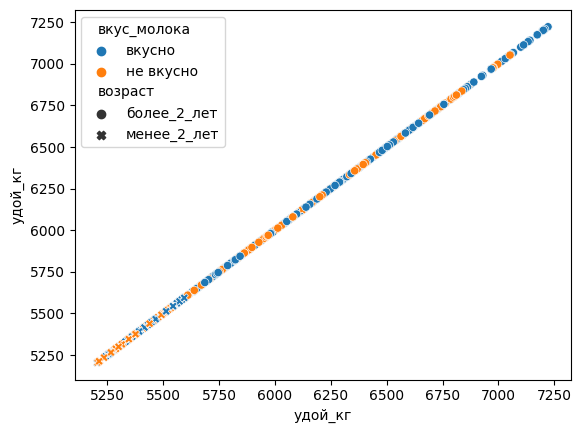

In [80]:
sns.scatterplot(data=cow_1,x="удой_кг",y="удой_кг",hue="вкус_молока",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Инетересная взаимосвязь, у коров которые дают больше молока, молоко вкуснее.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='эке_энергетическая_кормовая_единица'>

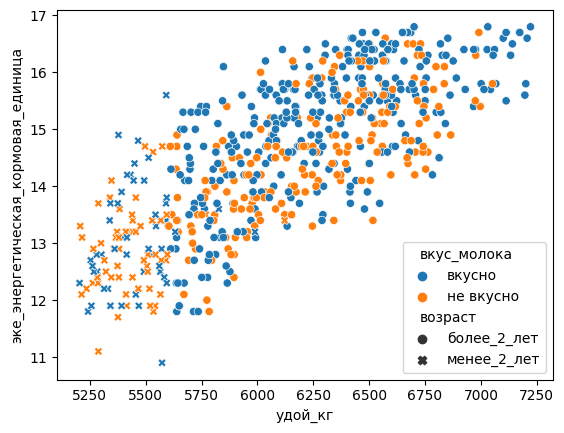

In [81]:
sns.scatterplot(data=cow_1,x="удой_кг",y="эке_энергетическая_кормовая_единица",hue="вкус_молока",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>ЭКЕ влияет на вкус молока. Чем больше ЭКЕ тем чаще молоко оказывается вкуснее.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='сырой_протеин_г'>

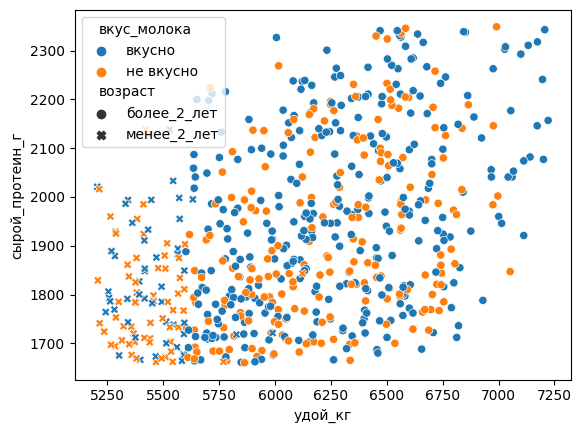

In [82]:
sns.scatterplot(data=cow_1,x="удой_кг",y="сырой_протеин_г",hue="вкус_молока",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Количество сырого протеина практичеки не влияет на вкус молока.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='спо_Сахаро-протеиновое_соотношение'>

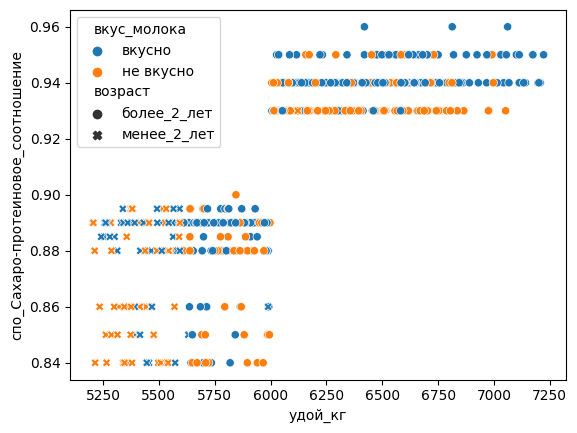

In [83]:
sns.scatterplot(data=cow_1,x="удой_кг",y="спо_Сахаро-протеиновое_соотношение",hue="вкус_молока",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Чем выше СПО тем чаще встречается вкусное молоко.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='жирность_%'>

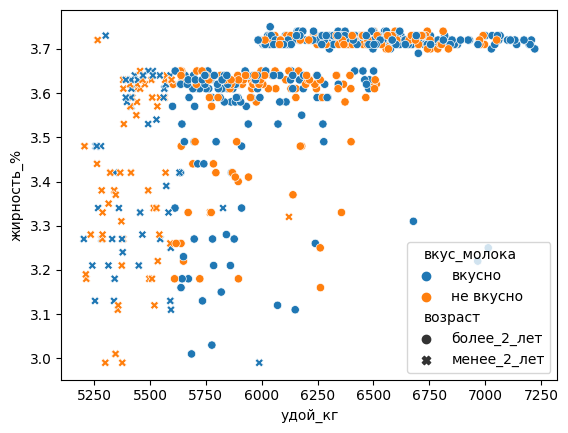

In [84]:
sns.scatterplot(data=cow_1,x="удой_кг",y="жирность_%",hue="вкус_молока",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Чем выше жирность тем чаще встречается вкусное молоко.
</div>

<AxesSubplot:xlabel='удой_кг', ylabel='белок_%'>

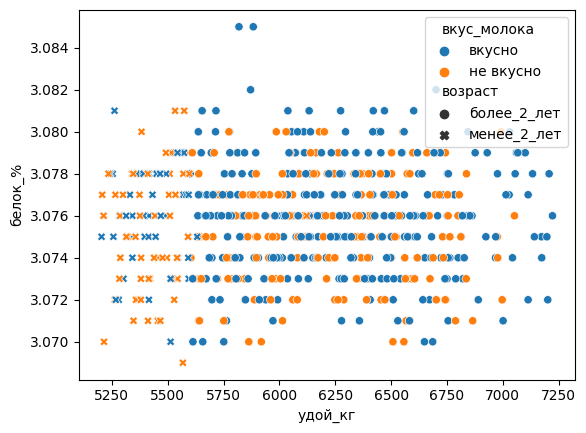

In [85]:
sns.scatterplot(data=cow_1,x="удой_кг",y="белок_%",hue="вкус_молока",style="возраст")

<div class="alert alert-info">
<b>Вывод:</b>
<br>Белок практически никак не влияет на то будет ли молоко вкусным или нет.
</div>

<div class="alert alert-info">
<b>Промежуточный вывод:</b>
<br>Почти всегда высокие показатели делают молоко вкусным (по мению фермера). 
</div>

<div class="alert alert-info">
<b>Вывод главы:</b>
<br> Были выявлены основные признаки влияющие на удой и вкус молока. Они помогут при МО
</div>

## Обучение модели линейной регрессии

In [86]:
cow_1.head()

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                                 14.2             1743   
1   2     5529                                 12.8             2138   
2   3     5810                                 14.0             1854   
3   4     5895                                 12.4             2012   
4   5     5302                                 12.8             1675   

   спо_Сахаро-протеиновое_соотношение           порода тип_пастбища  \
0                               0.890   вис бик айдиал    равнинное   
1                               0.890   вис бик айдиал    равнинное   
2                               0.885  рефлешнсоверинг    холмистое   
3                               0.885  рефлешнсоверинг    холмистое   
4                               0.885   вис бик айдиал    равнинное   

  порода_папы_быка  жирность_%  белок_% вкус_молока      возраст  
0           айдиал        3.58    3.076      вкусно  более_2_лет  
1          соверин        3.54    3.079      вкусно  менее_2_лет  
2          соверин        3.59    3.074   не вкусно  более_2_лет  
3           айдиал        3.40    3.075   не вкусно  более_2_лет  
4          соверин        3.73    3.073      вкусно  менее_2_лет

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Обучаем первую модель.
</div>

In [87]:
X = cow_1.drop([ 'id','белок_%','жирность_%','вкус_молока','удой_кг'] , axis = 1)
y = cow_1['удой_кг']

RANDOM_STATE = 42

milk_yield_mo = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE) 

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['эке_энергетическая_кормовая_единица', 'сырой_протеин_г', 'спо_Сахаро-протеиновое_соотношение']

In [88]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])

X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pr.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pr.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pr.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pr.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pr.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pr.concat([X_test_ohe, X_test_scaled], axis=1)

In [89]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Строим гистограмму и значение r2
</div>

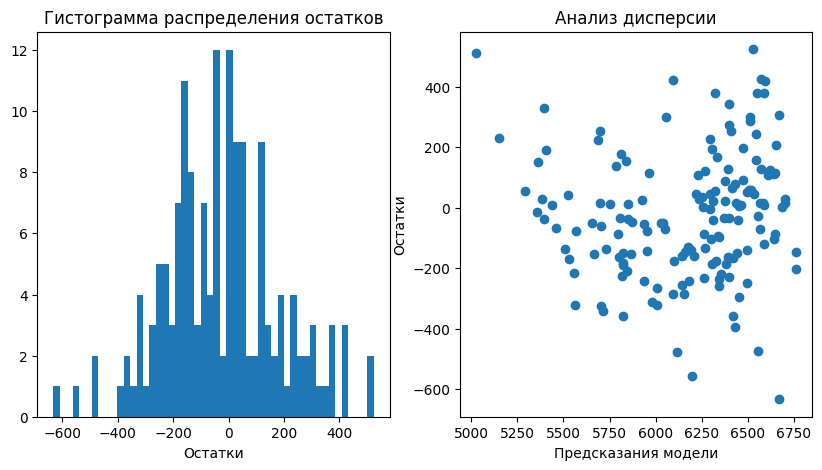

In [90]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [91]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f'Значение r2:{r2}')
print(f'Значение mse:{mse}')
print(f'Значение rmse:{rmse}')
print(f'Значение mae:{mae}')

Значение r2:0.7844078173416966
Значение mse:43887.015009660514
Значение rmse:209.4922791170608
Значение mae:164.2419446347493


<div class="alert alert-info">
<b>Вывод:</b>
<br>78% верных ответов. Нужно больше.
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Устраняем нелинейность и строим вторую модель.
</div>

In [92]:
def wan_zero(i):
    if i >= 0.92:
        return 1
    if i < 0.92:
        return 0
cow_1['спо_Сахаро-протеиновое_соотношение'] = cow_1['спо_Сахаро-протеиновое_соотношение'].apply(wan_zero)

cow_1['эке_энергетическая_кормовая_единица_в_квадрате'] = cow_1['эке_энергетическая_кормовая_единица']**2

In [93]:
X = cow_1.drop(['id','белок_%','жирность_%','вкус_молока','удой_кг','эке_энергетическая_кормовая_единица'] , axis = 1)
y = cow_1['удой_кг']

milk_yield_mo = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE) 

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['эке_энергетическая_кормовая_единица_в_квадрате', 'сырой_протеин_г', 'спо_Сахаро-протеиновое_соотношение']

In [94]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])

X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pr.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pr.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pr.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pr.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pr.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pr.concat([X_test_ohe, X_test_scaled], axis=1)

In [95]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Строим гистограмму и значение r2
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Строим гистограмму и значение r2
</div>

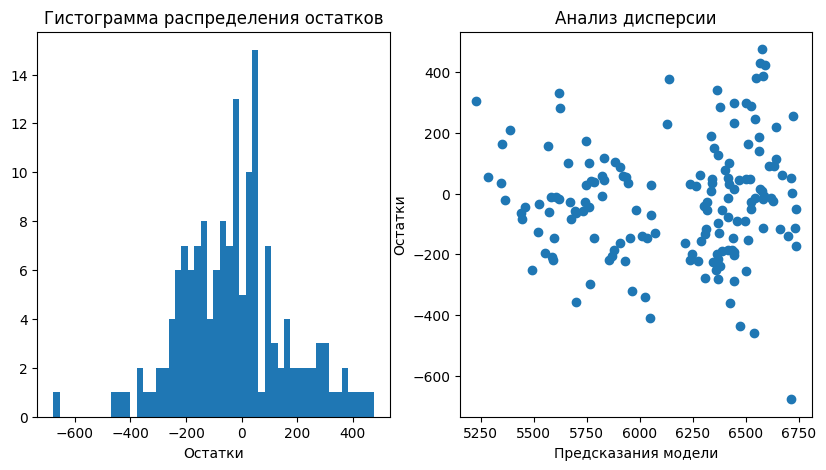

In [96]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [97]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f'Значение r2:{r2}')
print(f'Значение mse:{mse}')
print(f'Значение rmse:{rmse}')
print(f'Значение mae:{mae}')

Значение r2:0.8180879926867503
Значение mse:37030.91131113694
Значение rmse:192.4341739690145
Значение mae:149.03965222364596


<div class="alert alert-info">
<b>Вывод:</b>
<br>81% верных ответов. Уже лучше.
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Добавляем в таблицу имена отцов быков и обучаем 3 модель
</div>

In [98]:
cow_1 = pr.merge(cow_1, cow_2, on="id")
cow_1.head()

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                                 14.2             1743   
1   2     5529                                 12.8             2138   
2   3     5810                                 14.0             1854   
3   4     5895                                 12.4             2012   
4   5     5302                                 12.8             1675   

   спо_Сахаро-протеиновое_соотношение           порода тип_пастбища  \
0                                   0   вис бик айдиал    равнинное   
1                                   0   вис бик айдиал    равнинное   
2                                   0  рефлешнсоверинг    холмистое   
3                                   0  рефлешнсоверинг    холмистое   
4                                   0   вис бик айдиал    равнинное   

  порода_папы_быка  жирность_%  белок_% вкус_молока      возраст  \
0           айдиал        3.58    3.076      вкусно  более_2_лет   
1          соверин        3.54    3.079      вкусно  менее_2_лет   
2          соверин        3.59    3.074   не вкусно  более_2_лет   
3           айдиал        3.40    3.075   не вкусно  более_2_лет   
4          соверин        3.73    3.073      вкусно  менее_2_лет   

   эке_энергетическая_кормовая_единица_в_квадрате  имя_папы  
0                                          201.64    буйный  
1                                          163.84  соловчик  
2                                          196.00     барин  
3                                          153.76    буйный  
4                                          163.84     барин

In [99]:
X = cow_1.drop(['id','белок_%','жирность_%','вкус_молока','удой_кг','эке_энергетическая_кормовая_единица'] , axis = 1)
y = cow_1['удой_кг']

milk_yield_mo = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE) 

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['эке_энергетическая_кормовая_единица_в_квадрате', 'сырой_протеин_г', 'спо_Сахаро-протеиновое_соотношение']

In [100]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])

X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pr.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pr.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pr.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pr.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pr.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pr.concat([X_test_ohe, X_test_scaled], axis=1)

In [101]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Строим гистограмму и значение r2
</div>

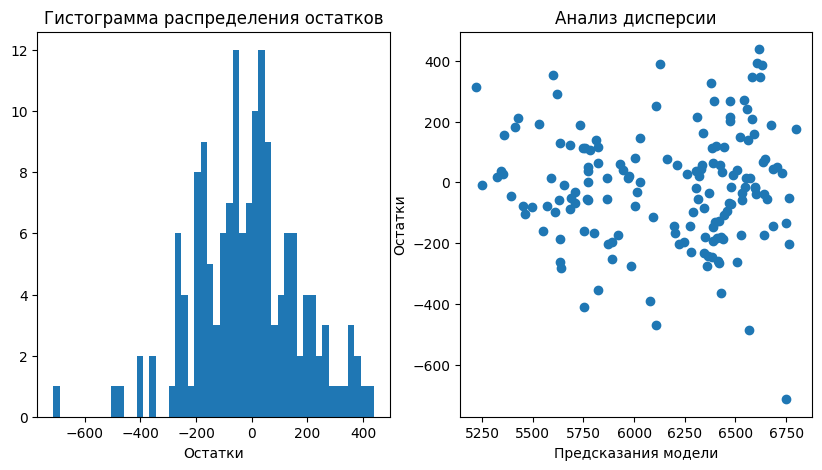

In [102]:
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [103]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f'Значение r2:{r2}')
print(f'Значение mse:{mse}')
print(f'Значение rmse:{rmse}')
print(f'Значение mae:{mae}')

Значение r2:0.8247542745210406
Значение mse:35673.88988618195
Значение rmse:188.8753289505592
Значение mae:146.16302445362314


<div class="alert alert-info">
<b>Вывод:</b>
<br>82% верных ответов. С этим уже можно работать.
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Делаем прогноз.
</div>

In [104]:
cow_3['эке_энергетическая_кормовая_единица'] = cow_1['эке_энергетическая_кормовая_единица'].mean()*1.05
cow_3['эке_энергетическая_кормовая_единица_в_квадрате'] = cow_3['эке_энергетическая_кормовая_единица']**2
cow_3['сырой_протеин_г'] = cow_1['сырой_протеин_г'].mean()*1.05
cow_3['спо_Сахаро-протеиновое_соотношение'] = cow_1['спо_Сахаро-протеиновое_соотношение'].mean()*1.05
cow_3['спо_Сахаро-протеиновое_соотношение'] = cow_3['спо_Сахаро-протеиновое_соотношение'].apply(wan_zero)
cow_3.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   вис бик айдиал    холмистое           айдиал  геркулес   
1   вис бик айдиал    равнинное          соверин    буйный   
2  рефлешнсоверинг    равнинное          соверин     барин   
3  рефлешнсоверинг    холмистое           айдиал    буйный   
4  рефлешнсоверинг    равнинное           айдиал    буйный   

   текущая_жирность_%  текущий_уровень_белок_%      возраст  \
0                3.58                    3.076  более_2_лет   
1                3.54                    3.081  менее_2_лет   
2                3.59                    3.074  более_2_лет   
3                3.40                    3.061  более_2_лет   
4                3.64                    3.074  более_2_лет   

   эке_энергетическая_кормовая_единица  \
0                            15.276162   
1                            15.276162   
2                            15.276162   
3                            15.276162   
4                            15.276162   

   эке_энергетическая_кормовая_единица_в_квадрате  сырой_протеин_г  \
0                                      233.361138      2019.947532   
1                                      233.361138      2019.947532   
2                                      233.361138      2019.947532   
3                                      233.361138      2019.947532   
4                                      233.361138      2019.947532   

   спо_Сахаро-протеиновое_соотношение  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0

In [105]:
X =cow_3.drop(['текущая_жирность_%', 'текущий_уровень_белок_%','эке_энергетическая_кормовая_единица'], axis = 1)
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['эке_энергетическая_кормовая_единица_в_квадрате', 'сырой_протеин_г', 'спо_Сахаро-протеиновое_соотношение']

In [106]:
X_ohe = encoder.fit_transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_ohe = pr.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = scaler.fit_transform(X[num_col_names])
X_scaled = pr.DataFrame(X_scaled, columns=num_col_names)

X = pr.concat([X_ohe, X_scaled], axis=1)

In [107]:
predictions = model_lr.predict(X)

In [108]:
cow_3['предсказание_удоя'] = predictions
cow_3.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   вис бик айдиал    холмистое           айдиал  геркулес   
1   вис бик айдиал    равнинное          соверин    буйный   
2  рефлешнсоверинг    равнинное          соверин     барин   
3  рефлешнсоверинг    холмистое           айдиал    буйный   
4  рефлешнсоверинг    равнинное           айдиал    буйный   

   текущая_жирность_%  текущий_уровень_белок_%      возраст  \
0                3.58                    3.076  более_2_лет   
1                3.54                    3.081  менее_2_лет   
2                3.59                    3.074  более_2_лет   
3                3.40                    3.061  более_2_лет   
4                3.64                    3.074  более_2_лет   

   эке_энергетическая_кормовая_единица  \
0                            15.276162   
1                            15.276162   
2                            15.276162   
3                            15.276162   
4                            15.276162   

   эке_энергетическая_кормовая_единица_в_квадрате  сырой_протеин_г  \
0                                      233.361138      2019.947532   
1                                      233.361138      2019.947532   
2                                      233.361138      2019.947532   
3                                      233.361138      2019.947532   
4                                      233.361138      2019.947532   

   спо_Сахаро-протеиновое_соотношение  предсказание_удоя  
0                                   0        6347.722110  
1                                   0        6116.513842  
2                                   0        6021.802589  
3                                   0        6330.892190  
4                                   0        6279.948880

In [109]:
st.t.interval(alpha=0.95, df=len(cow_3['предсказание_удоя'])-1, loc=np.mean(cow_3['предсказание_удоя']), scale=st.sem(cow_3['предсказание_удоя'])) 

(6125.296014334508, 6280.248884909384)

<div class="alert alert-info">
<b>Вывод главы:</b>
<br> Были построены 3 линейные модели прогнозирующие удой. На модели показавшей лучший результат был проведен прогноз удоя в таблице cow_3.
</div>

## Обучение модели логистической регрессии

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Обучаем модель для предсказания вкуса молока.
</div>

In [110]:
cow_1.head()

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                                 14.2             1743   
1   2     5529                                 12.8             2138   
2   3     5810                                 14.0             1854   
3   4     5895                                 12.4             2012   
4   5     5302                                 12.8             1675   

   спо_Сахаро-протеиновое_соотношение           порода тип_пастбища  \
0                                   0   вис бик айдиал    равнинное   
1                                   0   вис бик айдиал    равнинное   
2                                   0  рефлешнсоверинг    холмистое   
3                                   0  рефлешнсоверинг    холмистое   
4                                   0   вис бик айдиал    равнинное   

  порода_папы_быка  жирность_%  белок_% вкус_молока      возраст  \
0           айдиал        3.58    3.076      вкусно  более_2_лет   
1          соверин        3.54    3.079      вкусно  менее_2_лет   
2          соверин        3.59    3.074   не вкусно  более_2_лет   
3           айдиал        3.40    3.075   не вкусно  более_2_лет   
4          соверин        3.73    3.073      вкусно  менее_2_лет   

   эке_энергетическая_кормовая_единица_в_квадрате  имя_папы  
0                                          201.64    буйный  
1                                          163.84  соловчик  
2                                          196.00     барин  
3                                          153.76    буйный  
4                                          163.84     барин

In [111]:
def taste_milk (milk):
    if milk == 'вкусно':
        return 1
    if milk == 'не вкусно':
        return 0 
cow_1['вкус_молока'] = cow_1['вкус_молока'].apply(taste_milk)
cow_1.head()

id  удой_кг  эке_энергетическая_кормовая_единица  сырой_протеин_г  \
0   1     5863                                 14.2             1743   
1   2     5529                                 12.8             2138   
2   3     5810                                 14.0             1854   
3   4     5895                                 12.4             2012   
4   5     5302                                 12.8             1675   

   спо_Сахаро-протеиновое_соотношение           порода тип_пастбища  \
0                                   0   вис бик айдиал    равнинное   
1                                   0   вис бик айдиал    равнинное   
2                                   0  рефлешнсоверинг    холмистое   
3                                   0  рефлешнсоверинг    холмистое   
4                                   0   вис бик айдиал    равнинное   

  порода_папы_быка  жирность_%  белок_%  вкус_молока      возраст  \
0           айдиал        3.58    3.076            1  более_2_лет   
1          соверин        3.54    3.079            1  менее_2_лет   
2          соверин        3.59    3.074            0  более_2_лет   
3           айдиал        3.40    3.075            0  более_2_лет   
4          соверин        3.73    3.073            1  менее_2_лет   

   эке_энергетическая_кормовая_единица_в_квадрате  имя_папы  
0                                          201.64    буйный  
1                                          163.84  соловчик  
2                                          196.00     барин  
3                                          153.76    буйный  
4                                          163.84     барин

In [112]:
X = cow_1.drop(['id','удой_кг','эке_энергетическая_кормовая_единица'] , axis = 1)
y = cow_1['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE) 

cat_col_names = ['порода', 'тип_пастбища', 'возраст','порода_папы_быка','имя_папы','спо_Сахаро-протеиновое_соотношение']
num_col_names = ['сырой_протеин_г', 'жирность_%', 'белок_%','эке_энергетическая_кормовая_единица_в_квадрате']

In [113]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])

X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pr.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pr.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pr.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pr.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pr.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pr.concat([X_test_ohe, X_test_scaled], axis=1)

In [114]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Смотрим метрики accuracy, recall, precision.
</div>

In [115]:
acc = accuracy_score(y_test, y_pred)
acc

0.6305732484076433

In [116]:
recall = recall_score(y_test, y_pred)
recall

0.8636363636363636

In [117]:
precision = precision_score(y_test, y_pred)
precision

0.6229508196721312

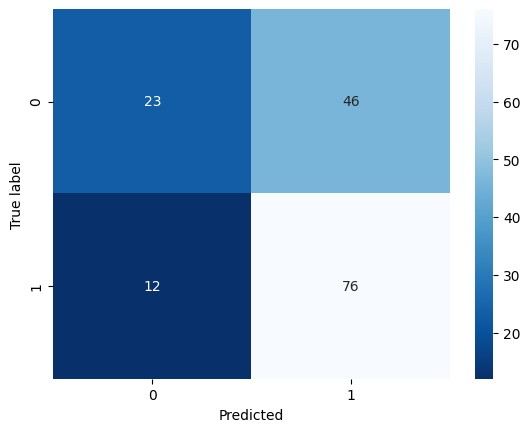

In [118]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

<div class="alert alert-info">
<b>Вывод:</b>
<br>precision нужно поднять до 1 
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Выясним каким должен быть порог для того что-бы precision равнялся 1
</div>

In [119]:
porog = 0.5
while True:
    porog += 0.01
    y_pred = (clf.predict_proba(X_test)[:,1] >= porog).astype(bool)
    if (precision_score(y_test, y_pred) == 1): break
porog

0.8100000000000003

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Смотрим на показатели метрик accuracy, recall, precision при пороге 0.81.
</div>

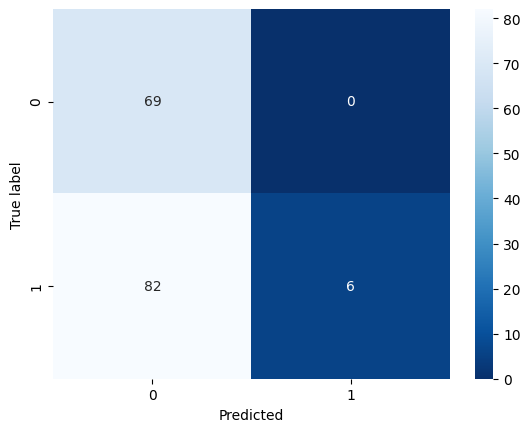

In [120]:
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.81).astype(bool)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [121]:
acc = accuracy_score(y_test, y_pred)
acc

0.47770700636942676

In [122]:
recall = recall_score(y_test, y_pred)
recall

0.06818181818181818

In [123]:
precision = precision_score(y_test, y_pred)
precision

1.0

<div class="alert alert-info">
<b>Вывод:</b>
<br>precision равен 1. можно делать прогноз. 
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Делаем прогноз вкуса молока.
</div>

In [124]:
cow_3.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   вис бик айдиал    холмистое           айдиал  геркулес   
1   вис бик айдиал    равнинное          соверин    буйный   
2  рефлешнсоверинг    равнинное          соверин     барин   
3  рефлешнсоверинг    холмистое           айдиал    буйный   
4  рефлешнсоверинг    равнинное           айдиал    буйный   

   текущая_жирность_%  текущий_уровень_белок_%      возраст  \
0                3.58                    3.076  более_2_лет   
1                3.54                    3.081  менее_2_лет   
2                3.59                    3.074  более_2_лет   
3                3.40                    3.061  более_2_лет   
4                3.64                    3.074  более_2_лет   

   эке_энергетическая_кормовая_единица  \
0                            15.276162   
1                            15.276162   
2                            15.276162   
3                            15.276162   
4                            15.276162   

   эке_энергетическая_кормовая_единица_в_квадрате  сырой_протеин_г  \
0                                      233.361138      2019.947532   
1                                      233.361138      2019.947532   
2                                      233.361138      2019.947532   
3                                      233.361138      2019.947532   
4                                      233.361138      2019.947532   

   спо_Сахаро-протеиновое_соотношение  предсказание_удоя  
0                                   0        6347.722110  
1                                   0        6116.513842  
2                                   0        6021.802589  
3                                   0        6330.892190  
4                                   0        6279.948880

In [125]:
X = cow_3.drop(['предсказание_удоя','эке_энергетическая_кормовая_единица'] , axis = 1)

cat_col_names = ['порода','тип_пастбища', 'возраст','порода_папы_быка','имя_папы']
num_col_names = ['сырой_протеин_г','спо_Сахаро-протеиновое_соотношение', 'текущая_жирность_%', 'текущий_уровень_белок_%','эке_энергетическая_кормовая_единица_в_квадрате']

In [126]:
X_ohe = encoder.fit_transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_ohe = pr.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = scaler.fit_transform(X[num_col_names])
X_scaled = pr.DataFrame(X_scaled, columns=num_col_names)

X = pr.concat([X_ohe, X_scaled], axis=1)

In [127]:
predictions = (clf.predict_proba(X)[:,1] >= 0.81)

In [128]:
def false_true(p):
    if p == False:
        return 'вкусно'
    if p == True:
        return 'не вкусно'

cow_3['вкус_молока_прогноз'] = predictions
cow_3['вкус_молока_прогноз'] = cow_3['вкус_молока_прогноз'].apply(false_true)

cow_3.head()

порода тип_пастбища порода_папы_быка  имя_папы  \
0   вис бик айдиал    холмистое           айдиал  геркулес   
1   вис бик айдиал    равнинное          соверин    буйный   
2  рефлешнсоверинг    равнинное          соверин     барин   
3  рефлешнсоверинг    холмистое           айдиал    буйный   
4  рефлешнсоверинг    равнинное           айдиал    буйный   

   текущая_жирность_%  текущий_уровень_белок_%      возраст  \
0                3.58                    3.076  более_2_лет   
1                3.54                    3.081  менее_2_лет   
2                3.59                    3.074  более_2_лет   
3                3.40                    3.061  более_2_лет   
4                3.64                    3.074  более_2_лет   

   эке_энергетическая_кормовая_единица  \
0                            15.276162   
1                            15.276162   
2                            15.276162   
3                            15.276162   
4                            15.276162   

   эке_энергетическая_кормовая_единица_в_квадрате  сырой_протеин_г  \
0                                      233.361138      2019.947532   
1                                      233.361138      2019.947532   
2                                      233.361138      2019.947532   
3                                      233.361138      2019.947532   
4                                      233.361138      2019.947532   

   спо_Сахаро-протеиновое_соотношение  предсказание_удоя вкус_молока_прогноз  
0                                   0        6347.722110              вкусно  
1                                   0        6116.513842              вкусно  
2                                   0        6021.802589              вкусно  
3                                   0        6330.892190              вкусно  
4                                   0        6279.948880              вкусно

<div class="alert alert-info">
<b>Вывод главы:</b>
<br>Была обучена модель логистическое регрессии, посчитаны метрики, подобран порог для сведения к нулю ошибки первого рода, а также спрогнозирован вкус молока.
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<br>выведем коров которые подходят под требования фермера.
</div>

In [129]:
cow_3.loc[(cow_3['предсказание_удоя'] > 6000) & (cow_3['вкус_молока_прогноз'] == "вкусно")]

порода тип_пастбища порода_папы_быка  имя_папы  \
0    вис бик айдиал    холмистое           айдиал  геркулес   
1    вис бик айдиал    равнинное          соверин    буйный   
2   рефлешнсоверинг    равнинное          соверин     барин   
3   рефлешнсоверинг    холмистое           айдиал    буйный   
4   рефлешнсоверинг    равнинное           айдиал    буйный   
5   рефлешнсоверинг    равнинное          соверин  геркулес   
7    вис бик айдиал    равнинное          соверин    буйный   
9   рефлешнсоверинг    холмистое           айдиал    буйный   
10   вис бик айдиал    холмистое          соверин  соловчик   
11  рефлешнсоверинг    равнинное          соверин  геркулес   
12   вис бик айдиал    холмистое           айдиал  геркулес   
15  рефлешнсоверинг    холмистое           айдиал    буйный   
16   вис бик айдиал    холмистое          соверин  соловчик   
17  рефлешнсоверинг    равнинное          соверин  геркулес   
18   вис бик айдиал    равнинное          соверин    буйный   

    текущая_жирность_%  текущий_уровень_белок_%      возраст  \
0                 3.58                    3.076  более_2_лет   
1                 3.54                    3.081  менее_2_лет   
2                 3.59                    3.074  более_2_лет   
3                 3.40                    3.061  более_2_лет   
4                 3.64                    3.074  более_2_лет   
5                 3.63                    3.053  менее_2_лет   
7                 3.57                    3.079  более_2_лет   
9                 3.40                    3.079  менее_2_лет   
10                3.73                    3.055  более_2_лет   
11                3.73                    3.073  более_2_лет   
12                3.68                    3.046  более_2_лет   
15                3.40                    3.065  более_2_лет   
16                3.73                    3.079  более_2_лет   
17                3.77                    3.053  менее_2_лет   
18                3.34                    3.069  более_2_лет   

    эке_энергетическая_кормовая_единица  \
0                             15.276162   
1                             15.276162   
2                             15.276162   
3                             15.276162   
4                             15.276162   
5                             15.276162   
7                             15.276162   
9                             15.276162   
10                            15.276162   
11                            15.276162   
12                            15.276162   
15                            15.276162   
16                            15.276162   
17                            15.276162   
18                            15.276162   

    эке_энергетическая_кормовая_единица_в_квадрате  сырой_протеин_г  \
0                                       233.361138      2019.947532   
1                                       233.361138      2019.947532   
2                                       233.361138      2019.947532   
3                                       233.361138      2019.947532   
4                                       233.361138      2019.947532   
5                                       233.361138      2019.947532   
7                                       233.361138      2019.947532   
9                                       233.361138      2019.947532   
10                                      233.361138      2019.947532   
11                                      233.361138      2019.947532   
12                                      233.361138      2019.947532   
15                                      233.361138      2019.947532   
16                                      233.361138      2019.947532   
17                                      233.361138      2019.947532   
18                                      233.361138      2019.947532   

    спо_Сахаро-протеиновое_соотношение  предсказание_удоя вкус_молока_прогноз  
0                                    0        6347.722110              вк

<div class="alert alert-info">
<b>Вывод:</b>
<br>Список коров которые подходят для покупки по параметрам.
</div>

<div class="alert alert-info">
<b>Общий вывод:</b>
<br>Для улучшения качества регрессионой модели были исспользованы стандартизация и кодирование категориальных признаков

При анализе рисков/экономических вопросов важные метрики precision и recall, которые позволяют отследить ошибки первого или второго рода и минимизировать экономические убытки.

В рамках данной работы был изучены несколько датафреймов. Они были проверены на пропуски и дубликаты. Пропусков не было, дубликаты были удалены. Далее были проанализированы данные, построены гистограммы, круговые диаграммы, графики зависимости и были рассчитаны коэффиценты корреляции для признаков датафреймов. После чего были обучены три модели линейной регрессии, одна модель логистической регрессии и были подведены итоги.
<br>Для более точных предсказаний удоя можно добавить ещё факторов которые на него могут влиять. 
</div>